<!-- 2DO: -->
<!-- truncation error of consistent vs lumped mass matrix for -->
<!-- diffusion and wave equations -->

Truncation error analysis provides a widely applicable framework for
analyzing the accuracy of finite difference schemes. This type of
analysis can also be used for finite element and finite volume methods
if the discrete equations are written in finite difference form.  The
result of the analysis is an asymptotic estimate of the error in the
scheme on the form $Ch^r$, where $h$ is a discretization parameter
($\Delta t$, $\Delta x$, etc.), $r$ is a number, known as the convergence
rate, and $C$ is a constant, typically dependent on the
derivatives of the exact solution.

Knowing $r$ gives understanding of the accuracy of the scheme. But
maybe even more important, a powerful verification method for computer
codes is to check that the empirically observed convergence rates in
experiments coincide with the theoretical value of $r$ found from
truncation error analysis.

The analysis
can be carried out by hand, by symbolic software, and also
numerically. All three methods will be illustrated.
From examining the symbolic expressions of the truncation error
we can add correction terms to the differential equations in order
to increase the numerical accuracy.

In general, the term truncation error refers to the discrepancy that
arises from performing a finite number of steps to approximate a
process with infinitely many steps. The term is used in a number
of contexts, including truncation of infinite series, finite
precision arithmetic, finite differences, and differential equations.
We shall be concerned with computing truncation errors arising in
finite difference formulas and in finite difference discretizations
of differential equations.


# Overview of truncation error analysis

## Abstract problem setting

Consider an abstract differential equation

$$
\mathcal{L}(u)=0,
$$

where $\mathcal{L}(u)$ is some formula involving the unknown $u$ and
its derivatives. One example is $\mathcal{L}(u)=u'(t)+a(t)u(t)-b(t)$, where
$a$ and $b$ are constants or functions of time.
We can discretize the differential equation and obtain a corresponding
discrete model, here written as

$$
\mathcal{L}_{\Delta}(u) =0\thinspace .
$$

The solution $u$ of this equation is the *numerical solution*.
To distinguish the
numerical solution from the exact solution of the differential
equation problem,
we denote the latter by $u$ and write the
differential equation and its discrete counterpart as

$$
\begin{align*}
\mathcal{L}(u)&=0,\\
\mathcal{L}_\Delta (u)&=0\thinspace .
\end{align*}
$$

Initial and/or boundary conditions can usually be left out of the truncation
error analysis and are omitted in the following.

The numerical solution $u$ is, in a finite difference method, computed
at a collection of mesh points. The discrete equations represented
by the abstract equation $\mathcal{L}_\Delta (u)=0$ are usually
algebraic equations involving $u$ at some
neighboring mesh points.

## Error measures

A key issue is how accurate the numerical solution is.
The ultimate way of addressing this issue would be to compute
the error $u - u$ at the mesh points. This is usually extremely demanding.
In very simplified problem settings we may, however, manage to
derive formulas for the numerical solution $u$, and
therefore closed form expressions
for the error $u - u$. Such special cases can provide
considerable insight regarding accuracy and stability, but
the results are established for special problems.

The error $u -u$ can be computed empirically in special cases where
we know $u$. Such cases can be constructed by the method of
manufactured solutions, where we choose some exact solution $u = v$
and fit a source term $f$ in the governing differential equation
$\mathcal{L}(u)=f$ such that $u=v$ is a solution (i.e.,
$f=\mathcal{L}(v)$).  Assuming an error model of the form $Ch^r$,
where $h$ is the discretization parameter, such as $\Delta t$ or
$\Delta x$, one can estimate the convergence rate $r$. This is a
widely applicable procedure, but the validity of the results is,
strictly speaking, tied to the chosen test problems.

Another error measure arises by asking to what extent the exact solution
$u$ fits the discrete equations. Clearly, $u$ is in general
not a solution of $\mathcal{L}_\Delta(u)=0$, but we can define
the residual

$$
R = \mathcal{L}_\Delta(u),
$$

and investigate how close $R$ is to zero. A small $R$ means
intuitively that the discrete equations are close to the
differential equation, and then we are tempted to think that
$u^n$ must also be close to $u(t_n)$.

The residual $R$ is known as the truncation error of the finite
difference scheme $\mathcal{L}_\Delta(u)=0$.  mathcal{I}_t appears that the
truncation error is relatively straightforward to compute by hand or
symbolic software *without specializing the differential equation
and the discrete model to a special case*. The resulting $R$ is found
as a power series in the discretization parameters. The leading-order
terms in the series provide an asymptotic measure of the accuracy of
the numerical solution method (as the discretization parameters
tend to zero). An advantage of truncation error analysis, compared to
empirical estimation of convergence rates, or detailed analysis
of a special problem with a mathematical expression for the numerical
solution, is that the truncation error analysis reveals the
accuracy of the various building blocks in the numerical method and
how each building block impacts the overall accuracy. The analysis
can therefore be used to detect building blocks with lower accuracy
than the others.

Knowing the truncation error or other error measures is important for
verification of programs by empirically establishing convergence
rates. The forthcoming text will provide many examples on how to
compute truncation errors for finite difference discretizations of
ODEs and PDEs.


# Truncation errors in finite difference formulas
<div id="trunc:finite:differences"></div>

The accuracy of a finite difference formula is a fundamental issue
when discretizing differential equations. We shall first go through a
particular example in detail and thereafter list the truncation error
in the most common finite difference approximation formulas.

## Example: The backward difference for $u'(t)$
<div id="trunc:fd:backward"></div>



Consider a backward
finite difference approximation of the first-order derivative $u'$:

<!-- Equation labels as ordinary links -->
<div id="trunc:fd:bw1"></div>

$$
\begin{equation}
\lbrack D_t^- u\rbrack^n  = \frac{u^{n} - u^{n-1}}{\Delta t} \approx u'(t_n)
\label{trunc:fd:bw1} \tag{1}
\thinspace .
\end{equation}
$$

Here, $u^n$ means the value of some function $u(t)$ at a point $t_n$, and
$[D_t^-u]^n$ is the *discrete derivative* of $u(t)$ at
$t=t_n$. The discrete derivative computed by a finite difference
is, in general, not exactly equal to the derivative $u'(t_n)$. The error in
the approximation is

<!-- Equation labels as ordinary links -->
<div id="trunc:fd:bw3"></div>

$$
\begin{equation}
R^n = [D^-_tu]^n - u'(t_n)\thinspace .
\label{trunc:fd:bw3} \tag{2}
\end{equation}
$$

The common way of calculating $R^n$ is to

1. expand $u(t)$ in a Taylor series around the point where the
   derivative is evaluated, here $t_n$,

2. insert this Taylor series in ([2](#trunc:fd:bw3)),
   and

3. collect terms that cancel and simplify the expression.

The result is an expression for $R^n$ in terms of a power series in
$\Delta t$. The error $R^n$ is commonly referred to as the *truncation
error* of the finite difference formula.

The Taylor series formula often found in calculus books takes the form

$$
f(x+h) = \sum_{i=0}^\infty \frac{1}{i!}\frac{d^if}{dx^i}(x)h^i\thinspace .
$$

In our application,
we expand the Taylor series around the point where the finite difference
formula approximates the derivative. The Taylor series of $u^n$ at $t_n$
is simply $u(t_n)$, while the Taylor series of $u^{n-1}$ at $t_n$ must
employ the general formula,

$$
\begin{align*}
u(t_{n-1}) = u(t-\Delta t) &= \sum_{i=0}^\infty \frac{1}{i!}\frac{d^iu}{dt^i}(t_n)(-\Delta t)^i\\
& = u(t_n) - u'(t_n)\Delta t + {\frac{1}{2}}u''(t_n)\Delta t^2
+ \mathcal{O}({\Delta t^3}),
\end{align*}
$$

where $\mathcal{O}({\Delta t^3})$ means a power-series in $\Delta t$ where
the lowest power is $\Delta t^3$. We assume that $\Delta t$ is small such that
$\Delta t^p \gg \Delta t^q$ if $p$ is smaller than $q$.
The details of higher-order terms
in $\Delta t$ are therefore not of much interest.
Inserting the Taylor series above in the right-hand side of
([2](#trunc:fd:bw3)) gives rise to some algebra:

$$
\begin{align*}
[D_t^-u]^n - u'(t_n) &= \frac{u(t_n) - u(t_{n-1})}{\Delta t} - u'(t_n)\\
&= \frac{u(t_n) - (u(t_n) - u'(t_n)\Delta t + {\frac{1}{2}}u''(t_n)\Delta t^2 + \mathcal{O}{\Delta t^3} )}{\Delta t} - u'(t_n)\\
&= -{\frac{1}{2}}u''(t_n)\Delta t + \mathcal{O}{\Delta t^2} ),
\end{align*}
$$

which is, according to
([2](#trunc:fd:bw3)), the truncation error:

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
R^n = - {\frac{1}{2}}u''(t_n)\Delta t + \mathcal({O}){\Delta t^2} )
\thinspace .
\label{_auto1} \tag{3}
\end{equation}
$$

The dominating term for small $\Delta t$ is $-{\frac{1}{2}}u''(t_n)\Delta t$,
which is proportional to $\Delta t$, and we say that the truncation error
is of *first order* in $\Delta t$.

## Example: The forward difference for $u'(t)$
<div id="trunc:fd:forward"></div>



We can analyze the approximation error in the forward difference

$$
u'(t_n) \approx [D_t^+ u]^n = \frac{u^{n+1}-u^n}{\Delta t},
$$

by writing

$$
R^n = [D_t^+ u]^n - u'(t_n),
$$

and expanding $u^{n+1}$ in a Taylor series around $t_n$,

$$
u(t_{n+1}) = u(t_n) + u'(t_n)\Delta t +
{\frac{1}{2}}u''(t_n)\Delta t^2 + \mathcal{O}{\Delta t^3}
\thinspace .
$$

The result becomes

$$
R = {\frac{1}{2}}u''(t_n)\Delta t +
\mathcal{O}{\Delta t^2},
$$

showing that also the forward difference is of first order.

## Example: The central difference for $u'(t)$
<div id="trunc:fd:central"></div>


For the central difference approximation,

$$
u'(t_n)\approx [ D_tu]^n, \quad [D_tu]^n =
\frac{u^{n+\frac{1}{2}} - u^{n-\frac{1}{2}}}{\Delta t},
$$

we write

$$
R^n = [ D_tu]^n - u'(t_n),
$$

and expand $u(t_{n+\frac{1}{2}})$ and
$u(t_{n-\frac{1}{2}}$ in Taylor series around the point $t_n$ where
the derivative is evaluated. We have

$$
\begin{align*}
u(t_{n+\frac{1}{2}}) = &u(t_n) + u'(t_n)\frac{1}{2}\Delta t +
{\frac{1}{2}}u''(t_n)(\frac{1}{2}\Delta t)^2 + \\
& \frac{1}{6}u'''(t_n) (\frac{1}{2}\Delta t)^3
+ \frac{1}{24}u''''(t_n) (\frac{1}{2}\Delta t)^4 + \\
& \frac{1}{120}u''''(t_n) (\frac{1}{2}\Delta t)^5 + \mathcal{O}{\Delta t^6},\\
u(t_{n-\frac{1}{2}}) = &u(t_n) - u'(t_n)\frac{1}{2}\Delta t +
{\frac{1}{2}}u''(t_n)(\frac{1}{2}\Delta t)^2 - \\
& \frac{1}{6}u'''(t_n) (\frac{1}{2}\Delta t)^3
+ \frac{1}{24}u''''(t_n) (\frac{1}{2}\Delta t)^4 - \\
& \frac{1}{120}u'''''(t_n) (\frac{1}{2}\Delta t)^5 + \mathcal{O}{\Delta t^6}
\thinspace .
\end{align*}
$$

Now,

$$
u(t_{n+\frac{1}{2}}) - u(t_{n-\frac{1}{2}}) = u'(t_n)\Delta t + \frac{1}{24}u'''(t_n) \Delta t^3 + \frac{1}{960}u'''''(t_n) \Delta t^5 + \mathcal{O}{\Delta t^7}
\thinspace .
$$

By collecting terms in $[D_t u]^n - u'(t_n)$ we find the truncation error
to be

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
R^n = \frac{1}{24}u'''(t_n)\Delta t^2 + \mathcal{O}{\Delta t^4},
\label{_auto2} \tag{4}
\end{equation}
$$

with only even powers of $\Delta t$. Since $R\sim \Delta t^2$ we say
the centered difference is of *second order* in $\Delta t$.

## Overview of leading-order error terms in finite difference formulas
<div id="trunc:table"></div>


Here we list the leading-order terms of the truncation errors
associated with several common finite difference formulas for the
first and second derivatives.

<!-- Equation labels as ordinary links -->
<div id="trunc:table:fd1:center:eq"></div>

$$
\begin{equation}
\lbrack D_tu \rbrack^n = \frac{u^{n+\frac{1}{2}} - u^{n-\frac{1}{2}}}{\Delta t} = u'(t_n) + R^n
\label{trunc:table:fd1:center:eq} \tag{5},
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:fd1:center"></div>

$$
\begin{equation} 
R^n = \frac{1}{24}u'''(t_n)\Delta t^2 + \mathcal{O}{\Delta t^4}
\label{trunc:table:fd1:center} \tag{6}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:fd1:center2:eq"></div>

$$
\begin{equation} 
 \lbrack D_{2t}u \rbrack^n = \frac{u^{n+1} - u^{n-1}}{2\Delta t} = u'(t_n) + R^n
\label{trunc:table:fd1:center2:eq} \tag{7},
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:fd1:center2"></div>

$$
\begin{equation} 
R^n = \frac{1}{6}u'''(t_n)\Delta t^2 + \mathcal{O}{\Delta t^4}
\label{trunc:table:fd1:center2} \tag{8}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:fd1:bw:eq"></div>

$$
\begin{equation} 
\lbrack D_t^-u \rbrack^n = \frac{u^{n} - u^{n-1}}{\Delta t} = u'(t_n) + R^n
\label{trunc:table:fd1:bw:eq} \tag{9},
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:fd1:bw"></div>

$$
\begin{equation} 
R^n = -{\frac{1}{2}}u''(t_n)\Delta t + \mathcal{O}{\Delta t^2}
\label{trunc:table:fd1:bw} \tag{10}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:fd1:fw:eq"></div>

$$
\begin{equation} 
\lbrack D_t^+u \rbrack^n = \frac{u^{n+1} - u^{n}}{\Delta t} = u'(t_n) + R^n
\label{trunc:table:fd1:fw:eq} \tag{11},
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:fd1:fw"></div>

$$
\begin{equation} 
R^n = {\frac{1}{2}}u''(t_n)\Delta t + \mathcal{O}{\Delta t^2}
\label{trunc:table:fd1:fw} \tag{12}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:fd1:theta:eq"></div>

$$
\begin{equation} 
[\bar D_tu]^{n+\theta} = \frac{u^{n+1} - u^{n}}{\Delta t} = u'(t_{n+\theta}) + R^{n+\theta}
\label{trunc:table:fd1:theta:eq} \tag{13},
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:fd1:theta"></div>

$$
\begin{equation} 
R^{n+\theta} = \frac{1}{2}(1-2\theta)u''(t_{n+\theta})\Delta t -
\frac{1}{6}((1 - \theta)^3 - \theta^3)u'''(t_{n+\theta})\Delta t^2 +
\mathcal{O}{\Delta t^3}
\label{trunc:table:fd1:theta} \tag{14}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:fd1:bw2:eq"></div>

$$
\begin{equation} 
\lbrack D_t^{2-}u \rbrack^n = \frac{3u^{n} - 4u^{n-1} + u^{n-2}}{2\Delta t} = u'(t_n) + R^n
\label{trunc:table:fd1:bw2:eq} \tag{15},
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:fd1:bw2"></div>

$$
\begin{equation} 
R^n = -\frac{1}{3}u'''(t_n)\Delta t^2 + \mathcal{O}{\Delta t^3}
\label{trunc:table:fd1:bw2} \tag{16}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:fd2:center:eq"></div>

$$
\begin{equation} 
\lbrack D_tD_t u \rbrack^n = \frac{u^{n+1} - 2u^{n} + u^{n-1}}{\Delta t^2} = u''(t_n) + R^n
\label{trunc:table:fd2:center:eq} \tag{17},
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:fd2:center"></div>

$$
\begin{equation} 
R^n = \frac{1}{12}u''''(t_n)\Delta t^2 + \mathcal{O}{\Delta t^4}
\label{trunc:table:fd2:center} \tag{18}
\end{equation}
$$

mathcal{I}_t will also be convenient to have the truncation errors for various
means or averages. The weighted arithmetic mean leads to

<!-- Equation labels as ordinary links -->
<div id="trunc:table:avg:theta:eq"></div>

$$
\begin{equation}
[\overline{u}^{t,\theta}]^{n+\theta}
 = \theta u^{n+1} + (1-\theta)u^n =
u(t_{n+\theta}) + R^{n+\theta},
\label{trunc:table:avg:theta:eq} \tag{19}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:avg:theta"></div>

$$
\begin{equation} 
R^{n+\theta} = {\frac{1}{2}}u''(t_{n+\theta})\Delta t^2\theta (1-\theta) +
\mathcal{O}{\Delta t^3}
\thinspace .
\label{trunc:table:avg:theta} \tag{20}
\end{equation}
$$

The standard arithmetic mean follows from this formula when
$\theta=\frac{1}{2}$. Expressed at point $t_n$ we get

<!-- Equation labels as ordinary links -->
<div id="trunc:table:avg:arith:eq"></div>

$$
\begin{equation}
[\overline{u}^{t}]^{n} = \frac{1}{2}(u^{n-\frac{1}{2}} + u^{n+\frac{1}{2}})
= u(t_n) + R^{n},
\label{trunc:table:avg:arith:eq} \tag{21}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:avg:arith"></div>

$$
\begin{equation} 
R^{n} = \frac{1}{8}u''(t_{n})\Delta t^2 + \frac{1}{384}u''''(t_n)\Delta t^4
+ \mathcal{O}{\Delta t^6}\thinspace .
\label{trunc:table:avg:arith} \tag{22}
\end{equation}
$$

The geometric mean also has an error $\mathcal{O}{\Delta t^2}$:

<!-- Equation labels as ordinary links -->
<div id="trunc:table:avg:geom:eq"></div>

$$
\begin{equation}
[\overline{u^2}^{t,g}]^{n} = u^{n-\frac{1}{2}}u^{n+\frac{1}{2}} = (u^n)^2 + R^n,
\label{trunc:table:avg:geom:eq} \tag{23}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:avg:geom"></div>

$$
\begin{equation} 
R^n = - \frac{1}{4}u'(t_n)^2\Delta t^2  + \frac{1}{4}u(t_n)u''(t_n)\Delta t^2
+ \mathcal{O}{\Delta t^4}
\thinspace .
\label{trunc:table:avg:geom} \tag{24}
\end{equation}
$$

The harmonic mean is also second-order accurate:

<!-- Equation labels as ordinary links -->
<div id="trunc:table:avg:harm:eq"></div>

$$
\begin{equation}
[\overline{u}^{t,h}]^{n} = u^n = \frac{2}{\frac{1}{u^{n-\frac{1}{2}}} + \frac{1}{u^{n+\frac{1}{2}}}}
+ R^{n+\frac{1}{2}},
\label{trunc:table:avg:harm:eq} \tag{25}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:table:avg:harm"></div>

$$
\begin{equation} 
R^n = - \frac{u'(t_n)^2}{4u(t_n)}\Delta t^2 + \frac{1}{8}u''(t_n)\Delta t^2
\thinspace .
\label{trunc:table:avg:harm} \tag{26}
\end{equation}
$$

## Software for computing truncation errors
<div id="trunc:sympy"></div>

We can use `sympy` to aid calculations with Taylor series.
The derivatives can be defined as symbols, say `D3f` for the
3rd derivative of some function $f$. A truncated Taylor series
can then be written as `f + D1f*h + D2f*h**2/2`. The following
class takes some symbol `f` for the function in question
and makes a list of symbols for the derivatives. The
`__call__` method computes the symbolic form of the series
truncated at `num_terms` terms.

In [1]:
import sympy as sym

In [2]:
# %load -s TaylorSeries, src-trunc/truncation_errors.py
class TaylorSeries:
    """Class for symbolic Taylor series."""
    def __init__(self, f, num_terms=4):
        self.f = f
        self.N = num_terms
        # Introduce symbols for the derivatives
        self.df = [f]
        for i in range(1, self.N+1):
            self.df.append(sym.Symbol('D%d%s' % (i, f.name)))

    def __call__(self, h):
        """Return the truncated Taylor series at x+h."""
        terms = self.f
        for i in range(1, self.N+1):
            terms += sym.Rational(1, sym.factorial(i))*self.df[i]*h**i
        return terms


We may, for example, use this class to compute the truncation error
of the Forward Euler finite difference formula:

In [3]:
from sympy import *
u, dt = symbols('u dt')
u_Taylor = TaylorSeries(u, 4)
u_Taylor(dt)

D1u*dt + D2u*dt**2/2 + D3u*dt**3/6 + D4u*dt**4/24 + u

In [4]:
FE = (u_Taylor(dt) - u)/dt
FE

(D1u*dt + D2u*dt**2/2 + D3u*dt**3/6 + D4u*dt**4/24)/dt

In [5]:
simplify(FE)

D1u + D2u*dt/2 + D3u*dt**2/6 + D4u*dt**3/24

The truncation error consists of the terms after the first one ($u'$).

The module file [`src-trunc/truncation_errors.py`](src-trunc/truncation_errors.py) contains another class `DiffOp` with symbolic expressions for
most of the truncation errors listed in the previous section.

In [6]:
# %load -s DiffOp, src-trunc/truncation_errors.py
class DiffOp:
    """Class for discrete difference operators."""
    def __init__(self, f, independent_variable='x',
                 num_terms_Taylor_series=4):
        self.Taylor = TaylorSeries(f, num_terms_Taylor_series)
        self.f = self.Taylor.f
        self.h = sym.Symbol('d%s' % independent_variable)

        # Finite difference operators
        h, f, f_T = self.h, self.f, self.Taylor # short names
        theta = sym.Symbol('theta')
        self.diffops = {
            'Dtp':  (f_T(h) - f)/h,
            'Dtm':  (f - f_T(-h))/h,
            'Dt':   (f_T(h/2) - f_T(-h/2))/h,
            'D2t':  (f_T(h) - f_T(-h))/(2*h),
            'DtDt': (f_T(h) - 2*f + f_T(-h))/h**2,
            'barDt': (f_T((1-theta)*h) - f_T(-theta*h))/h,
            }
        self.diffops = {diffop: sym.simplify(self.diffops[diffop])
                        for diffop in self.diffops}

        self.diffops['weighted_arithmetic_mean'] = \
             self._weighted_arithmetic_mean()
        self.diffops['geometric_mean'] = self._geometric_mean()
        self.diffops['harmonic_mean'] = self._harmonic_mean()

    def _weighted_arithmetic_mean(self):
        # The expansion is around n*h + theta*h
        h, f, f_T = self.h, self.f, self.Taylor
        theta = sym.Symbol('theta')
        f_n = f_T(-h*theta)
        f_np1 = f_T((1-theta)*h)
        a_mean = theta*f_np1 + (1-theta)*f_n
        return sym.expand(a_mean)

    def _geometric_mean(self):
        h, f, f_T = self.h, self.f, self.Taylor
        f_nmhalf = f_T(-h/2)
        f_nphalf = f_T(h/2)
        g_mean = f_nmhalf*f_nphalf
        return sym.expand(g_mean)

    def _harmonic_mean(self):
        h, f, f_T = self.h, self.f, self.Taylor
        f_nmhalf = f_T(-h/2)
        f_nphalf = f_T(h/2)
        h_mean = 2/(1/f_nmhalf + 1/f_nphalf)
        return sym.expand(h_mean)

    def D(self, i):
        """Return the symbol for the i-th derivative."""
        return self.Taylor.df[i]

    def __getitem__(self, operator_name):
        return self.diffops.get(operator_name, None)

    def operator_names(self):
        """Return all names for the operators."""
        return list(self.diffops.keys())


An example of its usage is as follows:

        >>> from truncation_errors import DiffOp
        >>> from sympy import *
        >>> u = Symbol('u')
        >>> diffop = DiffOp(u, independent_variable='t')
        >>> diffop['geometric_mean']
        -D1u**2*dt**2/4 - D1u*D3u*dt**4/48 + D2u**2*dt**4/64 + ...
        >>> diffop['Dtm']
        D1u + D2u*dt/2 + D3u*dt**2/6 + D4u*dt**3/24
        >>> >>> diffop.operator_names()
        ['geometric_mean', 'harmonic_mean', 'Dtm', 'D2t', 'DtDt',
         'weighted_arithmetic_mean', 'Dthinspace .', 'Dt']


The indexing of `diffop` applies names that correspond to the operators:
`Dtp` for $D^+_t$, `Dtm` for $D_t^-$, `Dt` for $D_t$, `D2t` for
$D_{2t}$, `DtDt` for $D_tD_t$.


# Exponential decay ODEs
<div id="trunc:decay"></div>


We shall now compute the truncation error of a finite difference
scheme for a differential equation.
Our first problem involves the following
linear ODE that models exponential decay,

<!-- Equation labels as ordinary links -->
<div id="trunc:decay:ode"></div>

$$
\begin{equation}
u'(t)=-au(t)\thinspace .
\label{trunc:decay:ode} \tag{27}
\end{equation}
$$

## Forward Euler scheme
<div id="trunc:decay:FE"></div>

We begin with the Forward Euler scheme for discretizing ([27](#trunc:decay:ode)):

<!-- Equation labels as ordinary links -->
<div id="trunc:decay:FE:scheme"></div>

$$
\begin{equation}
\lbrack D_t^+ u = -au \rbrack^n
\label{trunc:decay:FE:scheme} \tag{28}
\thinspace .
\end{equation}
$$

The idea behind the truncation error computation is to insert
the exact solution $u$ of the differential equation problem
([27](#trunc:decay:ode))
in the discrete equations ([28](#trunc:decay:FE:scheme)) and find the residual
that arises because $u$ does not solve the discrete equations.
Instead, $u$ solves the discrete equations with a residual $R^n$:

<!-- Equation labels as ordinary links -->
<div id="trunc:decay:FE:uex"></div>

$$
\begin{equation}
[D_t^+ u + au = R]^n
\label{trunc:decay:FE:uex} \tag{29}
\thinspace .
\end{equation}
$$

From ([11](#trunc:table:fd1:fw:eq))-([12](#trunc:table:fd1:fw)) it follows that

$$
[D_t^+ u]^n = u'(t_n) +
\frac{1}{2}u''(t_n)\Delta t + \mathcal{O}{\Delta t^2},
$$

which inserted in ([29](#trunc:decay:FE:uex)) results in

$$
u'(t_n) +
\frac{1}{2}u''(t_n)\Delta t + \mathcal{O}{\Delta t^2}
+ au(t_n) = R^n
\thinspace .
$$

Now, $u'(t_n) + au^n = 0$ since $u$ solves the differential equation.
The remaining terms constitute the residual:

<!-- Equation labels as ordinary links -->
<div id="trunc:decay:FE:R"></div>

$$
\begin{equation}
R^n = \frac{1}{2}u''(t_n)\Delta t + \mathcal{O}{\Delta t^2}
\label{trunc:decay:FE:R} \tag{30}
\thinspace .
\end{equation}
$$

This is the truncation error $R^n$ of the Forward Euler scheme.

Because $R^n$ is proportional to $\Delta t$, we say that
the Forward Euler scheme is of first order in $\Delta t$.
However, the truncation error
is just one error measure, and it is not equal to the true error
$u^n - u^n$. For this simple model problem we can compute
a range of different error measures for the Forward Euler scheme,
including the true error $u^n - u^n$, and all of them
have dominating terms proportional to $\Delta t$.

## Crank-Nicolson scheme
<div id="trunc:decay:CN"></div>

For the Crank-Nicolson scheme,

<!-- Equation labels as ordinary links -->
<div id="trunc:decay:CN:scheme"></div>

$$
\begin{equation}
[D_t u = -au]^{n+\frac{1}{2}},
\label{trunc:decay:CN:scheme} \tag{31}
\end{equation}
$$

we compute the truncation error by inserting the exact solution of
the ODE and adding a residual $R$,

<!-- Equation labels as ordinary links -->
<div id="trunc:decay:CN:scheme:R"></div>

$$
\begin{equation}
[D_t u + a\overline{u}^{t} = R]^{n+\frac{1}{2}}
\thinspace .
\label{trunc:decay:CN:scheme:R} \tag{32}
\end{equation}
$$

The term $[D_tu]^{n+\frac{1}{2}}$ is easily computed
from ([5](#trunc:table:fd1:center:eq))-([6](#trunc:table:fd1:center))
by replacing $n$
with $n+{\frac{1}{2}}$ in the formula,

$$
\lbrack D_tu\rbrack^{n+\frac{1}{2}} = u'(t_{n+\frac{1}{2}}) +
\frac{1}{24}u'''(t_{n+\frac{1}{2}})\Delta t^2 + \mathcal{O}{\Delta t^4}\thinspace .
$$

The arithmetic mean is related to $u(t_{n+\frac{1}{2}})$ by
([21](#trunc:table:avg:arith:eq))-([22](#trunc:table:avg:arith)) so

$$
[a\overline{u}^{t}]^{n+\frac{1}{2}}
= u(t_{n+\frac{1}{2}}) + \frac{1}{8}u''(t_{n})\Delta t^2 +
+ \mathcal{O}{\Delta t^4}\thinspace .
$$

Inserting these expressions in ([32](#trunc:decay:CN:scheme:R)) and
observing that $u'(t_{n+\frac{1}{2}}) +au^{n+\frac{1}{2}} = 0$, because
$u(t)$ solves the ODE $u'(t)=-au(t)$ at any point $t$,
we find that

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
R^{n+\frac{1}{2}} = \left(
\frac{1}{24}u'''(t_{n+\frac{1}{2}}) + \frac{1}{8}u''(t_{n})
\right)\Delta t^2 + \mathcal{O}{\Delta t^4}
\label{_auto3} \tag{33}
\end{equation}
$$

Here, the truncation error is of second order because the leading
term in $R$ is proportional to $\Delta t^2$.

At this point it is wise to redo some of the computations above
to establish the truncation error of the Backward Euler scheme,
see [Problem 4: Truncation error of the Backward Euler scheme](#trunc:exer:decay:BE).


## The $\theta$-rule
<div id="trunc:decay:theta"></div>

We may also compute the truncation error of the $\theta$-rule,

$$
[\bar D_t u = -a\overline{u}^{t,\theta}]^{n+\theta}
\thinspace .
$$

Our computational task is to find $R^{n+\theta}$ in

$$
[\bar D_t u  + a\overline{u}^{t,\theta} = R]^{n+\theta}
\thinspace .
$$

From ([13](#trunc:table:fd1:theta:eq))-([14](#trunc:table:fd1:theta)) and
([19](#trunc:table:avg:theta:eq))-([20](#trunc:table:avg:theta)) we get
expressions for the terms with $u$.
Using that $u'(t_{n+\theta}) + au(t_{n+\theta})=0$,
we end up with

$$
R^{n+\theta}
=
({\frac{1}{2}}-\theta)u''(t_{n+\theta})\Delta t +
\frac{1}{2}\theta (1-\theta)u''(t_{n+\theta})\Delta t^2 + \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation} 
 \frac{1}{2}(\theta^2 -\theta + 3)u'''(t_{n+\theta})\Delta t^2
+ \mathcal{O}{\Delta t^3}
\label{_auto4} \tag{34}
\end{equation}
$$

For $\theta =\frac{1}{2}$ the first-order term vanishes and the scheme is of
second order, while for $\theta\neq \frac{1}{2}$ we only have a first-order scheme.

## Using symbolic software
<div id="trunc:decay:software"></div>

The previously mentioned `truncation_error` module can be used to
automate the Taylor series expansions and the process of
collecting terms. Here is an example on possible use:

In [7]:
# %load -s decay, src-trunc/session.py
def decay():
    u, a = symbols('u a')
    diffop = DiffOp(u, independent_variable='t',
                    num_terms_Taylor_series=3)
    D1u = diffop.D(1)   # symbol for du/dt
    ODE = D1u + a*u     # define ODE
    # Define schemes
    FE = diffop['Dtp'] + a*u
    CN = diffop['Dt' ] + a*u
    BE = diffop['Dtm'] + a*u
    theta = diffop['barDt'] + a*diffop['weighted_arithmetic_mean']
    theta = simplify(expand(theta))
    # Residuals (truncation errors)
    R = {'FE': FE-ODE, 'BE': BE-ODE, 'CN': CN-ODE, 'theta': theta-ODE}
    return R


The returned dictionary can be viewed by printing the result of the `decay` function:

In [8]:
from pprint import pprint
pprint(decay())

{'BE': -D2u*dt/2 + D3u*dt**2/6,
 'CN': D3u*dt**2/24,
 'FE': D2u*dt/2 + D3u*dt**2/6,
 'theta': -D2u*a*dt**2*theta**2/2 + D2u*a*dt**2*theta/2 - D2u*dt*theta + D2u*dt/2 + D3u*a*dt**3*theta**3/3 - D3u*a*dt**3*theta**2/2 + D3u*a*dt**3*theta/6 + D3u*dt**2*theta**2/2 - D3u*dt**2*theta/2 + D3u*dt**2/6}


The results are in correspondence with our hand-derived expressions.

## Empirical verification of the truncation error
<div id="trunc:decay:estimate:R"></div>


The task of this section is to demonstrate how we can compute
the truncation error $R$ numerically. For example, the truncation
error of the Forward Euler scheme applied to the decay ODE $u'=-ua$
is

<!-- Equation labels as ordinary links -->
<div id="trunc:decay:FE:R:comp"></div>

$$
\begin{equation}
R^n = [D_t^+u + au]^n
\label{trunc:decay:FE:R:comp} \tag{35}
\thinspace .
\end{equation}
$$

If we happen to know the exact solution $u(t)$, we can easily evaluate
$R^n$ from the above formula.

To estimate how $R$ varies with the discretization parameter $\Delta
t$, which has been our focus in the previous mathematical derivations,
we first make the assumption that $R=C\Delta t^r$ for
appropriate constants $C$ and
$r$ and small enough $\Delta t$. The rate $r$ can be estimated from a series
of experiments where $\Delta t$ is varied. Suppose we have
$m$ experiments $(\Delta t_i, R_i)$, $i=0,\ldots,m-1$.
For two consecutive experiments $(\Delta t_{i-1}, R_{i-1})$
and $(\Delta t_i, R_i)$, a corresponding $r_{i-1}$ can be estimated by

<!-- Equation labels as ordinary links -->
<div id="trunc:R:empir1"></div>

$$
\begin{equation}
r_{i-1} = \frac{\ln (R_{i-1}/R_i)}{\ln (\Delta t_{i-1}/\Delta t_i)},
\label{trunc:R:empir1} \tag{36}
\end{equation}
$$

for $i=1,\ldots,m-1$. Note that the truncation error $R_i$ varies
through the mesh, so ([36](#trunc:R:empir1)) is to be applied
pointwise. A complicating issue is that $R_i$ and $R_{i-1}$ refer to
different meshes. Pointwise comparisons of the truncation error at a
certain point in all meshes therefore requires any
computed $R$ to be restricted to the *coarsest mesh* and that
all finer meshes contain all the points in the coarsest mesh.
Suppose we have
$N_0$ intervals in the coarsest mesh. Inserting a superscript $n$ in
([36](#trunc:R:empir1)), where $n$ counts mesh points in the coarsest
mesh, $n=0,\ldots,N_0$, leads to the formula

<!-- Equation labels as ordinary links -->
<div id="trunc:R:empir2"></div>

$$
\begin{equation}
r_{i-1}^n = \frac{\ln (R_{i-1}^n/R_i^n)}{\ln (\Delta t_{i-1}/\Delta t_i)}
\thinspace .
\label{trunc:R:empir2} \tag{37}
\end{equation}
$$

Experiments are most conveniently defined by $N_0$ and a number of
refinements $m$. Suppose each mesh has twice as many cells $N_i$ as the previous
one:

$$
N_i = 2^iN_0,\quad \Delta t_i = TN_i^{-1},
$$

where $[0,T]$ is the total time interval for the computations.
Suppose the computed $R_i$ values on the mesh with $N_i$ intervals
are stored in an array `R[i]` (`R` being a list of arrays, one for
each mesh). Restricting this $R_i$ function to
the coarsest mesh means extracting every $N_i/N_0$ point and is done
as follows:

```python
stride = N[i]/N_0
R[i] = R[i][::stride]
```

The quantity `R[i][n]` now corresponds to $R_i^n$.

In addition to estimating $r$ for the pointwise values
of $R=C\Delta t^r$, we may also consider an integrated quantity
on mesh $i$,

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
R_{I,i} = \left(\Delta t_i\sum_{n=0}^{N_i} (R_i^n)^2\right)^\frac{1}{2}\approx \int_0^T R_i(t)dt
\thinspace .
\label{_auto5} \tag{38}
\end{equation}
$$

The sequence $R_{I,i}$, $i=0,\ldots,m-1$, is also expected to
behave as $C\Delta t^r$, with the same $r$ as for the pointwise quantity
$R$, as $\Delta t\rightarrow 0$.

The function below computes the $R_i$ and $R_{I,i}$ quantities, plots
them and compares with
the theoretically derived truncation error (`R_a`) if available.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# %load -s estimate, src-trunc/trunc_empir.py
def estimate(truncation_error, T, N_0, m, makeplot=True):
    """
    Compute the truncation error in a problem with one independent
    variable, using m meshes, and estimate the convergence
    rate of the truncation error.

    The user-supplied function truncation_error(dt, N) computes
    the truncation error on a uniform mesh with N intervals of
    length dt::

      R, t, R_a = truncation_error(dt, N)

    where R holds the truncation error at points in the array t,
    and R_a are the corresponding theoretical truncation error
    values (None if not available).

    The truncation_error function is run on a series of meshes
    with 2**i*N_0 intervals, i=0,1,...,m-1.
    The values of R and R_a are restricted to the coarsest mesh.
    and based on these data, the convergence rate of R (pointwise)
    and time-integrated R can be estimated empirically.
    """
    N = [2**i*N_0 for i in range(m)]

    R_I = np.zeros(m) # time-integrated R values on various meshes
    R   = [None]*m    # time series of R restricted to coarsest mesh
    R_a = [None]*m    # time series of R_a restricted to coarsest mesh
    dt = np.zeros(m)
    legends_R = [];  legends_R_a = []  # all legends of curves

    for i in range(m):
        dt[i] = T/float(N[i])
        R[i], t, R_a[i] = truncation_error(dt[i], N[i])

        R_I[i] = np.sqrt(dt[i]*np.sum(R[i]**2))

        if i == 0:
            t_coarse = t           # the coarsest mesh

        stride = N[i]//N_0
        R[i] = R[i][::stride]      # restrict to coarsest mesh
        R_a[i] = R_a[i][::stride]

        if makeplot:
            plt.figure(1)
            plt.plot(t_coarse, R[i])
            plt.yscale("log")
            legends_R.append('N=%d' % N[i])

            plt.figure(2)
            plt.plot(t_coarse, R_a[i] - R[i])
            plt.yscale("log")
            legends_R_a.append('N=%d' % N[i])

    if makeplot:
        plt.figure(1)
        plt.xlabel('time')
        plt.ylabel('pointwise truncation error')
        plt.legend(legends_R)
        plt.savefig('R_series.png')
        plt.savefig('R_series.pdf')
        plt.figure(2)
        plt.xlabel('time')
        plt.ylabel('pointwise error in estimated truncation error')
        plt.legend(legends_R_a)
        plt.savefig('R_error.png')
        plt.savefig('R_error.pdf')

    # Convergence rates
    r_R_I = convergence_rates(dt, R_I)
    print('R integrated in time; r:', end=' ')
    print(' '.join(['%.1f' % r for r in r_R_I]))
    R = np.array(R)  # two-dim. numpy array
    r_R = [convergence_rates(dt, R[:,n])[-1]
           for n in range(len(t_coarse))]

    # Plot convergence rates
    if makeplot:
        plt.figure()
        plt.plot(t_coarse, r_R)
        plt.xlabel('time')
        plt.ylabel('r')
        plt.axis([t_coarse[0], t_coarse[-1], 0, 2.5])
        plt.title('Pointwise rate $r$ in truncation error $\sim\Delta t^r$')
        plt.savefig('R_rate_series.png')
        plt.savefig('R_rate_series.pdf')


The first `makeplot` block demonstrates how to build up two figures
in parallel, using `plt.figure(i)` to create and switch to figure number
`i.` Figure numbers start at 1. A logarithmic scale is used on the
$y$ axis since we expect that $R$ as a function of time (or mesh points)
is exponential. The reason is that the theoretical estimate
([30](#trunc:decay:FE:R)) contains $u''$, which for the present model
goes like $e^{-at}$. Taking the logarithm makes a straight line.

The code follows closely the previously
stated mathematical formulas, but the statements for computing the convergence
rates might deserve an explanation.
The generic help function `convergence_rate(h, E)` computes and returns
$r_{i-1}$, $i=1,\ldots,m-1$ from ([37](#trunc:R:empir2)),
given $\Delta t_i$ in `h` and
$R_i^n$ in `E`:

In [11]:
# %load -s convergence_rates, src-trunc/trunc_empir.py
def convergence_rates(h, E):
    """
    Given a sequence of discretization parameters in the list h,
    and corresponding errors in the list E,
    compute the convergence rate of two successive (h[i], E[i])
    and (h[i+1],E[i+1]) experiments, assuming the model E=C*h^r
    (for small enough h).
    """
    from math import log
    r = [log(E[i]/E[i-1])/log(h[i]/h[i-1])
         for i in range(1, len(h))]
    return r


Calling `r_R_I = convergence_rates(dt, R_I)` computes the sequence
of rates $r_0,r_1,\ldots,r_{m-2}$ for the model $R_I\sim\Delta t^r$,
while the statements

```python
R = np.array(R)  # two-dim. numpy array
r_R = [convergence_rates(dt, R[:,n])[-1]
       for n in range(len(t_coarse))]
```

compute the final rate $r_{m-2}$ for $R^n\sim\Delta t^r$ at each mesh
point $t_n$ in the coarsest mesh. This latter computation deserves
more explanation. Since `R[i][n]` holds the estimated
truncation error $R_i^n$ on mesh $i$, at point $t_n$ in the coarsest mesh,
`R[:,n]` picks out the sequence $R_i^n$ for $i=0,\ldots,m-1$.
The `convergence_rate` function computes the rates at $t_n$, and by
indexing `[-1]` on the returned array from `convergence_rate`,
we pick the rate $r_{m-2}$, which we believe is the best estimation since
it is based on the two finest meshes.

The `estimate` function is available in a module
[`trunc_empir.py`](src-trunc/trunc_empir.py).
Let us apply this function to estimate the truncation
error of the Forward Euler scheme. We need a function `decay_FE(dt, N)`
that can compute ([35](#trunc:decay:FE:R:comp)) at the
points in a mesh with time step `dt` and `N` intervals:

In [12]:
# %load -s decay_FE, src-trunc/trunc_decay_FE.py
def decay_FE(dt, N):
    dt = float(dt)
    t = np.linspace(0, N*dt, N+1)
    u_e = I*np.exp(-a*t)  # exact solution, I and a are global
    u = u_e  # naming convention when writing up the scheme
    R = np.zeros(N)

    for n in range(0, N):
        R[n] = (u[n+1] - u[n])/dt + a*u[n]

    # Theoretical expression for the trunction error
    R_a = 0.5*I*(-a)**2*np.exp(-a*t)*dt

    return R, t[:-1], R_a[:-1]


The estimated rates for the integrated truncation error $R_I$ become
1.1, 1.0, and 1.0 for this sequence of four meshes. All the rates
for $R^n$, computed as `r_R`, are also very close to 1 at all mesh points.
The agreement between the theoretical formula ([30](#trunc:decay:FE:R))
and the computed quantity (ref([35](#trunc:decay:FE:R:comp))) is
very good, as illustrated below.

R integrated in time; r: 1.1 1.0 1.0


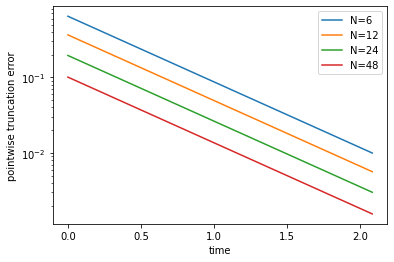

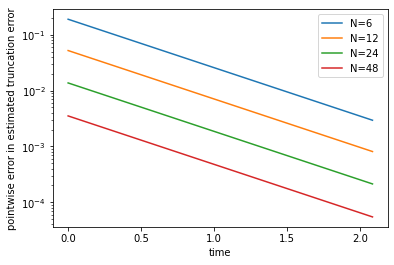

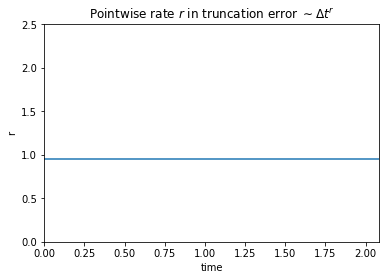

In [13]:
I = 1
a = 2  # global variables needed in decay_FE
estimate(decay_FE, T=2.5, N_0=6, m=4, makeplot=True)


The program [`trunc_decay_FE.py`](src-trunc/trunc_decay_FE.py)
was used to perform the simulations and it can easily be modified to
test other schemes (see also [Exercise 5: Empirical estimation of truncation errors](#trunc:exer:decay:estimate)).


## Increasing the accuracy by adding correction terms
<div id="trunc:decay:corr"></div>


Now we ask the question: can we add terms in the differential equation
that can help increase the order of the truncation error? To be precise,
let us revisit the Forward Euler scheme for $u'=-au$, insert the
exact solution $u$, include a residual $R$, but also include
new terms $C$:

<!-- Equation labels as ordinary links -->
<div id="trunc:decay:FE:corr"></div>

$$
\begin{equation}
\lbrack D_t^+ u + au = C + R \rbrack^n\thinspace .
\label{trunc:decay:FE:corr} \tag{39}
\end{equation}
$$

Inserting the Taylor expansions for $[D_t^+u]^n$ and keeping
terms up to 3rd order in $\Delta t$ gives the equation

$$
\frac{1}{2}u''(t_n)\Delta t - \frac{1}{6}u'''(t_n)\Delta t^2
+ \frac{1}{24}u''''(t_n)\Delta t^3
+ \mathcal{O}{\Delta t^4}  = C^n + R^n\thinspace .
$$

Can we find $C^n$ such that $R^n$ is $\mathcal{O}{\Delta t^2}$?
Yes, by setting

$$
C^n = \frac{1}{2}u''(t_n)\Delta t,
$$

we manage to cancel the first-order term and

$$
R^n = \frac{1}{6}u'''(t_n)\Delta t^2 + \mathcal{O}{\Delta t^3}\thinspace .
$$

The correction term $C^n$ introduces $\frac{1}{2}\Delta t u''$
in the discrete equation, and we have to get rid of the derivative
$u''$. One idea is to approximate $u''$ by a second-order accurate finite
difference formula, $u''\approx (u^{n+1}-2u^n+u^{n-1})/\Delta t^2$,
but this introduces an additional time level
with $u^{n-1}$. Another approach is to rewrite $u''$ in terms of $u'$
or $u$ using the ODE:

$$
u'=-au\quad\Rightarrow\quad u''=-au' = -a(-au)= a^2u\thinspace .
$$

This  means that we can simply set
$C^n = {\frac{1}{2}}a^2\Delta t u^n$. We can then either
solve the discrete equation

<!-- Equation labels as ordinary links -->
<div id="trunc:decay:corr:FE:discrete"></div>

$$
\begin{equation}
[D_t^+ u = -au + {\frac{1}{2}}a^2\Delta t u]^n,
\label{trunc:decay:corr:FE:discrete} \tag{40}
\end{equation}
$$

or we can equivalently discretize the perturbed ODE

<!-- Equation labels as ordinary links -->
<div id="trunc:decay:corr:FE:ODE"></div>

$$
\begin{equation}
u' = -\hat au ,\quad \hat a = a(1 - {\frac{1}{2}}a\Delta t),
\label{trunc:decay:corr:FE:ODE} \tag{41}
\end{equation}
$$

by a Forward Euler method. That is, we replace the original coefficient
$a$ by the perturbed coefficient $\hat a$. Observe that
$\hat a\rightarrow a$ as $\Delta t\rightarrow 0$.

The Forward Euler method applied to ([41](#trunc:decay:corr:FE:ODE))
results in

$$
[D_t^+ u = -a(1 - {\frac{1}{2}}a\Delta t)u]^n\thinspace .
$$

We can control our computations and verify that the truncation error
of the scheme above is indeed $\mathcal{O}{\Delta t^2}$.

Another way of revealing the fact that the perturbed ODE leads
to a more accurate solution is to look at the amplification factor.
Our scheme can be written as

$$
u^{n+1} = Au^n,\quad A = 1-\hat a\Delta t = 1 - p + {\frac{1}{2}}p^2,\quad p=a\Delta t,
$$

The amplification factor $A$ as a function of $p=a\Delta t$ is seen to be
the first three terms of the Taylor series for the exact amplification
factor $e^{-p}$. The Forward Euler scheme for $u=-au$ gives only the
first two terms $1-p$ of the Taylor series for $e^{-p}$. That is,
using $\hat a$ increases the order of the accuracy in the amplification factor.

Instead of replacing $u''$ by $a^2u$, we use the relation
$u''=-au'$ and add a term $-{\frac{1}{2}}a\Delta t u'$
in the ODE:

$$
u'=-au - {\frac{1}{2}}a\Delta t u'\quad\Rightarrow\quad
\left( 1 + {\frac{1}{2}}a\Delta t\right) u' = -au\thinspace .
$$

Using a Forward Euler method results in

$$
\left( 1 + {\frac{1}{2}}a\Delta t\right)\frac{u^{n+1}-u^n}{\Delta t}
= -au^n,
$$

which after some algebra can be written as

$$
u^{n+1} = \frac{1 - {\frac{1}{2}}a\Delta t}{1+{\frac{1}{2}}a\Delta t}u^n\thinspace .
$$

This is the same formula as the one arising from a Crank-Nicolson
scheme applied to $u'=-au$!
mathcal{I}_t is now recommended to do [Exercise 6: Correction term for a Backward Euler scheme](#trunc:exer:decay:corr:BE) and
repeat the above steps to see what kind of correction term is needed
in the Backward Euler scheme to make it second order.

The Crank-Nicolson scheme is a bit more challenging to analyze, but
the ideas and techniques are the same. The discrete equation reads

$$
[D_t u = -au ]^{n+\frac{1}{2}},
$$

and the truncation error is defined through

$$
[D_t u + a\overline{u}^{t} = C + R]^{n+\frac{1}{2}},
$$

where we have added a correction term.  We need to Taylor expand both
the discrete derivative and the arithmetic mean with aid of
([5](#trunc:table:fd1:center:eq))-([6](#trunc:table:fd1:center)) and
([21](#trunc:table:avg:arith:eq))-([22](#trunc:table:avg:arith)), respectively.
The result is

$$
\frac{1}{24}u'''(t_{n+\frac{1}{2}})\Delta t^2 + \mathcal{O}{\Delta t^4}
+ \frac{a}{8}u''(t_{n+\frac{1}{2}})\Delta t^2 + \mathcal{O}{\Delta t^4} = C^{n+\frac{1}{2}} + R^{n+\frac{1}{2}}\thinspace .
$$

The goal now is to make $C^{n+\frac{1}{2}}$ cancel the $\Delta t^2$ terms:

$$
C^{n+\frac{1}{2}} =
\frac{1}{24}u'''(t_{n+\frac{1}{2}})\Delta t^2
+ \frac{a}{8}u''(t_{n})\Delta t^2\thinspace .
$$

Using $u'=-au$, we have that $u''=a^2u$, and we find that $u'''=-a^3u$.
We can therefore solve the perturbed ODE problem

$$
u' = -\hat a u,\quad \hat a = a(1 - \frac{1}{12}a^2\Delta t^2),
$$

by the Crank-Nicolson scheme and obtain a method that is of fourth
order in $\Delta t$. [Problem 7: Verify the effect of correction terms](#trunc:exer:decay:corr:verify)
encourages you to implement these correction terms and calculate
empirical convergence rates to verify that higher-order accuracy
is indeed obtained in real computations.


## Extension to variable coefficients

Let us address the decay ODE with variable coefficients,

$$
u'(t) = -a(t)u(t) + b(t),
$$

discretized by the Forward Euler scheme,

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
[D_t^+ u = -au + b]^n
\thinspace .
\label{_auto6} \tag{42}
\end{equation}
$$

The truncation error $R$ is as always found by inserting the exact
solution $u(t)$ in the discrete scheme:

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
[D_t^+ u + au - b = R]^n
\thinspace .
\label{_auto7} \tag{43}
\end{equation}
$$

Using ([11](#trunc:table:fd1:fw:eq))-([12](#trunc:table:fd1:fw)),

$$
u'(t_n) - \frac{1}{2}u''(t_n)\Delta t + \mathcal{O}{\Delta t^2}
+ a(t_n)u(t_n) - b(t_n) = R^n
\thinspace .
$$

Because of the ODE,

$$
u'(t_n) + a(t_n)u(t_n) - b(t_n) =0,
$$

we are left with the result

<!-- Equation labels as ordinary links -->
<div id="trunc:decay:vc:R"></div>

$$
\begin{equation}
R^n = -\frac{1}{2}u''(t_n)\Delta t + \mathcal{O}{\Delta t^2}
\label{trunc:decay:vc:R} \tag{44}
\thinspace .
\end{equation}
$$

We see that the variable coefficients do not pose any additional difficulties
in this case. [Problem 8: Truncation error of the Crank-Nicolson scheme](#trunc:exer:decay:varcoeff:CN) takes the
analysis above one step further to the Crank-Nicolson scheme.

## Exact solutions of the finite difference equations


Having a mathematical expression for the numerical solution is very
valuable in program verification, since we then know the exact numbers
that the program should produce. Looking at the various
formulas for the truncation errors in
([5](#trunc:table:fd1:center:eq))-([6](#trunc:table:fd1:center)) and
([25](#trunc:table:avg:harm:eq))-([26](#trunc:table:avg:harm)) in
the section [Overview of leading-order error terms in finite difference formulas](#trunc:table), we see that all but two of
the $R$ expressions contain a second or higher order derivative
of $u$. The exceptions are the geometric and harmonic
means where the truncation
error involves $u'$ and even $u$ in case of the harmonic mean.
So, apart from these two means,
choosing $u$ to be a linear function of
$t$, $u = ct+d$ for constants $c$ and $d$, will make
the truncation error vanish since $u''=0$. Consequently,
the truncation error of a finite difference scheme will be zero
since the various
approximations used will all be exact. This means that the linear solution
is an exact solution of the discrete equations.

In a particular differential equation problem, the reasoning above can
be used to determine if we expect a linear $u$ to fulfill the
discrete equations. To actually prove that this is true, we can either
compute the truncation error and see that it vanishes, or we can
simply insert $u(t)=ct+d$ in the scheme and see that it fulfills
the equations. The latter method is usually the simplest. mathcal{I}_t will
often be necessary to add some source term to the ODE in order to
allow a linear solution.

Many ODEs are discretized by centered differences.
From the section [Overview of leading-order error terms in finite difference formulas](#trunc:table) we see that all the centered
difference formulas have truncation errors involving $u'''$ or
higher-order derivatives.
A quadratic solution, e.g., $u(t) =t^2 + ct + d$,
will then make the truncation errors vanish. This observation
can be used to test if a quadratic solution will fulfill the
discrete equations. Note that a quadratic solution will not
obey the equations for a Crank-Nicolson scheme for $u'=-au+b$
because the approximation applies an arithmetic mean, which
involves a truncation error with $u''$.


## Computing truncation errors in nonlinear problems
<div id="trunc:decay:gen"></div>

The general nonlinear ODE

<!-- Equation labels as ordinary links -->
<div id="trunc:decay:gen:ode"></div>

$$
\begin{equation}
u'=f(u,t),
\label{trunc:decay:gen:ode} \tag{45}
\end{equation}
$$

can be solved by a Crank-Nicolson scheme

<!-- Equation labels as ordinary links -->
<div id="trunc:decay:gen:ode:fdm"></div>

$$
\begin{equation}
[D_t u=\overline{f}^{t}]^{n+\frac{1}{2}}\thinspace .
\label{trunc:decay:gen:ode:fdm} \tag{46}
\end{equation}
$$

The truncation error is as always defined as the residual arising
when inserting the
exact solution $u$ in the scheme:

<!-- Equation labels as ordinary links -->
<div id="trunc:decay:gen:ode:CN"></div>

$$
\begin{equation}
[D_t u - \overline{f}^{t}= R]^{n+\frac{1}{2}}\thinspace .
\label{trunc:decay:gen:ode:CN} \tag{47}
\end{equation}
$$

Using ([21](#trunc:table:avg:arith:eq))-([22](#trunc:table:avg:arith)) for
$\overline{f}^{t}$ results in

$$
\begin{align*}
[\overline{f}^{t}]^{n+\frac{1}{2}} &=
\frac{1}{2}(f(u^n,t_n) + f(u^{n+1},t_{n+1}))\\
&= f(u^{n+\frac{1}{2}},t_{n+\frac{1}{2}}) +
\frac{1}{8}u''(t_{n+\frac{1}{2}})\Delta t^2
+ \mathcal{O}{\Delta t^4}\thinspace .
\end{align*}
$$

With ([5](#trunc:table:fd1:center:eq))-([6](#trunc:table:fd1:center)) the discrete
equations ([47](#trunc:decay:gen:ode:CN)) lead to

$$
u'(t_{n+\frac{1}{2}}) +
\frac{1}{24}u'''(t_{n+\frac{1}{2}})\Delta t^2
- f(u^{n+\frac{1}{2}},t_{n+\frac{1}{2}}) -
\frac{1}{8}u''(t_{n+\frac{1}{2}})\Delta t^2
+ \mathcal{O}{\Delta t^4} = R^{n+\frac{1}{2}}\thinspace .
$$

Since $u'(t_{n+\frac{1}{2}}) - f(u^{n+\frac{1}{2}},t_{n+\frac{1}{2}})=0$,
the truncation error becomes

$$
R^{n+\frac{1}{2}} = (\frac{1}{24}u'''(t_{n+\frac{1}{2}})
- \frac{1}{8}u''(t_{n+\frac{1}{2}})) \Delta t^2\thinspace .
$$

The computational techniques worked well
even for this nonlinear ODE.


# Vibration ODEs
<div id="trunc:vib"></div>

## Linear model without damping
<div id="trunc:vib:undamped"></div>

The next example on computing the truncation error involves the
following ODE for vibration problems:

<!-- Equation labels as ordinary links -->
<div id="trunc:vib:undamped:ode"></div>

$$
\begin{equation}
u''(t) + \omega^2 u(t) = 0\thinspace .
\label{trunc:vib:undamped:ode} \tag{48}
\end{equation}
$$

Here, $\omega$ is a given constant.

### The truncation error of a centered finite difference scheme

Using a standard, second-ordered, central difference for the
second-order derivative in time, we have the scheme

<!-- Equation labels as ordinary links -->
<div id="trunc:vib:undamped:scheme"></div>

$$
\begin{equation}
[D_tD_t u + \omega^2u=0]^n
\label{trunc:vib:undamped:scheme} \tag{49}
\thinspace .
\end{equation}
$$

Inserting the exact solution $u$ in this equation and adding
a residual $R$ so that $u$ can fulfill the equation results in

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}
[D_tD_t u + \omega^2u =R]^n
\thinspace .
\label{_auto8} \tag{50}
\end{equation}
$$

To calculate the truncation error $R^n$, we use
([17](#trunc:table:fd2:center:eq))-([18](#trunc:table:fd2:center)), i.e.,

$$
[D_tD_t u]^n = u''(t_n) + \frac{1}{12}u''''(t_n)\Delta t^2
+ \mathcal{O}{\Delta t^4},
$$

and the fact that $u''(t) + \omega^2u(t)=0$. The result is

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation}
R^n =  \frac{1}{12}u''''(t_n)\Delta t^2 + \mathcal{O}{\Delta t^4}
\thinspace .
\label{_auto9} \tag{51}
\end{equation}
$$

### The truncation error of approximating $u'(0)$

The initial conditions for ([48](#trunc:vib:undamped:ode)) are
$u(0)=I$ and $u'(0)=V$. The latter involves a finite difference
approximation. The standard choice

$$
[D_{2t}u=V]^0,
$$

where $u^{-1}$ is eliminated with the aid of the discretized ODE
for $n=0$, involves a centered difference with an
$\mathcal{O}{\Delta t^2}$ truncation error
given by ([7](#trunc:table:fd1:center2:eq))-([8](#trunc:table:fd1:center2)).
The simpler choice

$$
[D_t^+u = V]^0,
$$

is based on a forward difference with a truncation error $\mathcal{O}{\Delta t}$.
A central question is if this initial error will impact the
order of the scheme throughout the simulation.
[Exercise 11: Investigate the impact of approximating $u'(0)$](#trunc:exer:vib:ic:fw) asks you to perform an
experiment to investigate this question.

### Truncation error of the equation for the first step

We have shown that the truncation error of the difference used to
approximate the initial condition $u'(0)=0$ is $\mathcal{O}{\Delta t^2}$, but we
can also investigate the difference equation used for the first
step. In a truncation error setting, the right way to view this
equation is not to use the initial condition $[D_{2t}u=V]^0$ to
express $u^{-1}=u^1 - 2\Delta t V$ in order to eliminate $u^{-1}$ from
the discretized differential equation, but the other way around: the
fundamental equation is the discretized initial condition
$[D_{2t}u=V]^0$ and we use the discretized ODE $[D_tD_t + \omega^2
u=0]^0$ to eliminate $u^{-1}$ in the discretized initial
condition. From $[D_tD_t + \omega^2 u=0]^0$ we have

$$
u^{-1} = 2u^0 - u^1 - \Delta t^2\omega^2 u^0,
$$

which inserted in $[D_{2t}u = V]^0$ gives

<!-- Equation labels as ordinary links -->
<div id="trunc:vib:undamped:ic:d2"></div>

$$
\begin{equation}
\frac{u^1 - u^0}{\Delta t} + \frac{1}{2}\omega^2\Delta t u^0 = V\thinspace .
\label{trunc:vib:undamped:ic:d2} \tag{52}
\end{equation}
$$

The first term can be recognized as a forward difference such that
the equation can be written in operator notation as

$$
[D_t^+ u + \frac{1}{2}\omega^2\Delta t u = V]^0\thinspace .
$$

The truncation error is defined as

$$
[D_t^+ u + \frac{1}{2}\omega^2\Delta t u - V = R]^0\thinspace .
$$

Using ([11](#trunc:table:fd1:fw:eq))-([12](#trunc:table:fd1:fw)) with
one more term in the Taylor series, we get that

$$
u'(0) + \frac{1}{2}u''(0)\Delta t + \frac{1}{6}u'''(0)\Delta t^2
 + \mathcal{O}{\Delta t^3}
+ \frac{1}{2}\omega^2\Delta t u(0) - V = R^n\thinspace .
$$

Now, $u'(0)=V$ and $u''(0)=-\omega^2 u(0)$ so we get

$$
R^n = \frac{1}{6}u'''(0)\Delta t^2 + \mathcal{O}{\Delta t^3}\thinspace .
$$

There is another way of analyzing the discrete initial
condition, because eliminating $u^{-1}$ via the discretized ODE
can be expressed as

<!-- Equation labels as ordinary links -->
<div id="trunc:vib:undamped:ic:d3"></div>

$$
\begin{equation}
[ D_{2t} u + \Delta t(D_tD_t u - \omega^2 u) = V]^0\thinspace .
\label{trunc:vib:undamped:ic:d3} \tag{53}
\end{equation}
$$

Writing out ([53](#trunc:vib:undamped:ic:d3)) shows that the equation is
equivalent to ([52](#trunc:vib:undamped:ic:d2)).
The truncation error is defined by

$$
[ D_{2t} u + \Delta t(D_tD_t u - \omega^2 u) = V + R]^0\thinspace .
$$

Replacing the difference via
([7](#trunc:table:fd1:center2:eq))-([8](#trunc:table:fd1:center2)) and
([17](#trunc:table:fd2:center:eq))-([18](#trunc:table:fd2:center)), as
well as using $u'(0)=V$ and $u''(0) = -\omega^2u(0)$,
gives

$$
R^n = \frac{1}{6}u'''(0)\Delta t^2 + \mathcal{O}{\Delta t^3}\thinspace .
$$

### Computing correction terms

The idea of using correction terms to increase the order of $R^n$ can
be applied as described in the section [Increasing the accuracy by adding correction terms](#trunc:decay:corr). We look at

$$
[D_tD_t u + \omega^2u =C + R]^n,
$$

and observe that $C^n$ must be chosen to cancel
the $\Delta t^2$ term in $R^n$. That is,

$$
C^n = \frac{1}{12}u''''(t_n)\Delta t^2\thinspace .
$$

To get rid of the 4th-order derivative we can use the differential
equation: $u''=-\omega^2u$, which implies $u'''' = \omega^4 u$.
Adding the correction term to the ODE results in

<!-- Equation labels as ordinary links -->
<div id="trunc:vib:undamped:corr:ode"></div>

$$
\begin{equation}
u'' + \omega^2(1 - \frac{1}{12}\omega^2\Delta t^2)u = 0\thinspace .
\label{trunc:vib:undamped:corr:ode} \tag{54}
\end{equation}
$$

Solving this equation by the standard scheme

$$
[D_tD_t u + \omega^2(1 - \frac{1}{12}\omega^2\Delta t^2)u=0]^n,
$$

will result in a scheme with truncation error $\mathcal{O}{\Delta t^4}$.

We can use another set of arguments to justify that ([54](#trunc:vib:undamped:corr:ode)) leads to a higher-order method.
Mathematical analysis of the scheme ([49](#trunc:vib:undamped:scheme))
reveals that the numerical frequency $\tilde\omega$ is (approximately
as $\Delta t\rightarrow 0$)

$$
\tilde\omega = \omega (1+\frac{1}{24}\omega^2\Delta t^2)\thinspace .
$$

One can therefore attempt to replace $\omega$ in the ODE by
a slightly smaller $\omega$ since the numerics will make it larger:
<!-- Ref to exercise -->

$$
[ u'' + (\omega(1 - \frac{1}{24}\omega^2\Delta t^2))^2 u ]^n = 0\thinspace .
$$

Expanding the squared term and omitting the higher-order term $\Delta t^4$
gives exactly the ODE ([54](#trunc:vib:undamped:corr:ode)).


## Model with damping and nonlinearity
<div id="trunc:vib:gen"></div>

The model ([48](#trunc:vib:undamped:ode))
can be extended to include damping $\beta u'$,
a nonlinear restoring (spring) force $s(u)$, and some
known excitation force $F(t)$:

<!-- Equation labels as ordinary links -->
<div id="trunc:vib:gen:ode1"></div>

$$
\begin{equation}
mu'' + \beta u' + s(u) =F(t)\thinspace .
\label{trunc:vib:gen:ode1} \tag{55}
\end{equation}
$$

The coefficient $m$ usually represents the mass of the system.
This governing equation can be discretized by centered differences:

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation}
[mD_tD_t u + \beta D_{2t} u + s(u)=F]^n
\thinspace .
\label{_auto10} \tag{56}
\end{equation}
$$

The exact solution $u$ fulfills the discrete equations with a residual term:

<!-- Equation labels as ordinary links -->
<div id="_auto11"></div>

$$
\begin{equation}
[mD_tD_t u + \beta D_{2t} u + s(u)=F + R]^n
\thinspace .
\label{_auto11} \tag{57}
\end{equation}
$$

Using ([17](#trunc:table:fd2:center:eq))-([18](#trunc:table:fd2:center)) and
([7](#trunc:table:fd1:center2:eq))-([8](#trunc:table:fd1:center2)) we
get

$$
\begin{align*}
\lbrack mD_tD_t u + \beta D_{2t} u\rbrack^n &=
mu''(t_n) + \beta{u}'(t_n) + \\
&\quad \left(\frac{m}{12}u''''(t_n) +
  \frac{\beta}{6}u'''(t_n)\right)\Delta t^2 + \mathcal{O}{\Delta t^4}
\end{align*}
$$

Combining this with the previous equation, we can collect the terms

$$
mu''(t_n) + \beta{u}'(t_n) + \omega^2u(t_n) + s(u(t_n)) - F^n,
$$

and set this sum to zero because $u$ solves
the differential equation. We are left with
the truncation error

<!-- Equation labels as ordinary links -->
<div id="trunc:vib:gen:R"></div>

$$
\begin{equation}
R^n = \left(\frac{m}{12}u''''(t_n) +
  \frac{\beta}{6}u'''(t_n)\right)\Delta t^2 + \mathcal{O}{\Delta t^4},
\label{trunc:vib:gen:R} \tag{58}
\end{equation}
$$

so the scheme is of second order.

According to ([58](#trunc:vib:gen:R)), we can add correction terms

$$
C^n = \left(\frac{m}{12}u''''(t_n) +
  \frac{\beta}{6}u'''(t_n)\right)\Delta t^2,
$$

to the right-hand side of the ODE to obtain a fourth-order scheme.
However, expressing $u''''$ and $u'''$ in terms
of lower-order derivatives is now harder because the differential equation
is more complicated:

$$
\begin{align*}
u''' &= \frac{1}{m}(F' - \beta u'' - s'(u)u'),\\
u'''' &= \frac{1}{m}(F'' - \beta u''' - s''(u)(u')^2 - s'(u)u''),\\
&= \frac{1}{m}(F'' - \beta \frac{1}{m}(F' - \beta u'' - s'(u)u')
- s''(u)(u')^2 - s'(u)u'')\thinspace .
\end{align*}
$$

mathcal{I}_t is not impossible to discretize the resulting modified ODE, but it is up
to debate whether correction terms are feasible and the way to go.
Computing with a smaller $\Delta t$ is usually always possible in these
problems to achieve the desired accuracy.

## Extension to quadratic damping

Instead of the linear damping term $\beta u'$ in ([55](#trunc:vib:gen:ode1))
we now consider quadratic damping $\beta |u'|u'$:

<!-- Equation labels as ordinary links -->
<div id="trunc:vib:gen:ode2"></div>

$$
\begin{equation}
mu'' + \beta |u'|u' + s(u) =F(t)\thinspace .
\label{trunc:vib:gen:ode2} \tag{59}
\end{equation}
$$

A centered difference for $u'$ gives rise to a nonlinearity, which can
be linearized using a geometric mean:
$[|u'|u']^n \approx |[u']^{n-\frac{1}{2}}|[u']^{n+\frac{1}{2}}$.
The resulting scheme becomes

<!-- Equation labels as ordinary links -->
<div id="_auto12"></div>

$$
\begin{equation}
[mD_t D_t u]^n + \beta |[D_{t} u]^{n-\frac{1}{2}}|[D_t u]^{n+\frac{1}{2}}
+ s(u^n)=F^n\thinspace .
\label{_auto12} \tag{60}
\end{equation}
$$

The truncation error is defined through

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

$$
\begin{equation}
[mD_t D_t u]^n +
\beta |[D_{t} u]^{n-\frac{1}{2}}|[D_t u]^{n+\frac{1}{2}}
+ s(u^n)-F^n = R^n\thinspace .
\label{_auto13} \tag{61}
\end{equation}
$$

We start with expressing the truncation error of the geometric mean.
According to ([23](#trunc:table:avg:geom:eq))-([24](#trunc:table:avg:geom)),

$$
\begin{align*}
|[D_{t} u]^{n-\frac{1}{2}}|[D_t u]^{n+\frac{1}{2}}
&= [|D_tu|D_tu]^n
- \frac{1}{4}u'(t_n)^2\Delta t^2  +\\
&\quad \frac{1}{4}u(t_n)u''(t_n)\Delta t^2
+ \mathcal{O}{\Delta t^4}\thinspace .
\end{align*}
$$

Using ([5](#trunc:table:fd1:center:eq))-([6](#trunc:table:fd1:center))
for the $D_tu$ factors results in

$$
[|D_tu|D_tu]^n = |u' + \frac{1}{24}u'''(t_n)\Delta t^2 +
\mathcal{O}{\Delta t^4}|(u' + \frac{1}{24}u'''(t_n)\Delta t^2 +
\mathcal{O}{\Delta t^4})
$$

We can remove the absolute value since it essentially gives a factor 1 or -1
only. Calculating the product, we have the leading-order terms

$$
[D_tu D_tu]^n = (u'(t_n))^2 +
\frac{1}{12}u(t_n)u'''(t_n)\Delta t^2 +
\mathcal{O}{\Delta t^4}\thinspace .
$$

With

$$
m[D_t D_tu]^n = mu''(t_n) + \frac{m}{12}u''''(t_n)\Delta t^2
+\mathcal{O}{\Delta t^4},
$$

and using the differential equation on the
form $mu'' + \beta (u')^2 + s(u)=F$, we end up with

$$
R^n = (\frac{m}{12}u''''(t_n) +
\frac{\beta}{12}u(t_n)u'''(t_n))
\Delta t^2 + \mathcal{O}{\Delta t^4}\thinspace .
$$

This result demonstrates that we have
second-order accuracy also with quadratic damping.
The key elements that lead to the second-order accuracy is that
the difference approximations are $\mathcal{O}{\Delta t^2}$ *and* the
geometric mean approximation is also $\mathcal{O}{\Delta t^2}$.

## The general model formulated as first-order ODEs
<div id="trunc:vib:gen:staggered"></div>


The second-order model ([59](#trunc:vib:gen:ode2)) can be
formulated as a first-order system,

<!-- Equation labels as ordinary links -->
<div id="trunc:vib:gen:2x2model:ode:v"></div>

$$
\begin{equation}
v' = \frac{1}{m}\left( F(t) - \beta |v|v - s(u)\right),
\label{trunc:vib:gen:2x2model:ode:v} \tag{62}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:vib:gen:2x2model:ode:u"></div>

$$
\begin{equation} 
u' = v\thinspace .
\label{trunc:vib:gen:2x2model:ode:u} \tag{63}
\end{equation}
$$

The system ([63](#trunc:vib:gen:2x2model:ode:u))-([63](#trunc:vib:gen:2x2model:ode:u)) can be solved either by a forward-backward scheme (the Euler-Cromer
method) or a centered
scheme on a staggered mesh.

[hpl 1: A basic problem at this stage is to show that Euler-Cromer is only
of first order. Well, that follows from each individual equation, but
the scheme is equivalent to a second-order scheme if we eliminate $v$.
Why? The staggered scheme has only 2nd-order approximations so that is
easy. I have not found any literature on the Euler-Cromer scheme
and its truncation error, except for the result (1st order).]


### A centered scheme on a staggered mesh

We now introduce a staggered mesh where we
seek $u$ at mesh points $t_n$ and $v$ at points $t_{n+\frac{1}{2}}$
in between the $u$ points. The staggered mesh makes it easy to
formulate centered differences in the system
([63](#trunc:vib:gen:2x2model:ode:u))-([63](#trunc:vib:gen:2x2model:ode:u)):

<!-- Equation labels as ordinary links -->
<div id="trunc:vib:gen:2x2model:ode:u:staggered"></div>

$$
\begin{equation}
\lbrack D_t u = v \rbrack^{n-\frac{1}{2}},
\label{trunc:vib:gen:2x2model:ode:u:staggered} \tag{64} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:vib:gen:2x2model:ode:v:staggered"></div>

$$
\begin{equation} 
\lbrack D_t v = \frac{1}{m}( F(t) - \beta |v|v - s(u)) \rbrack^{n}\thinspace .
\label{trunc:vib:gen:2x2model:ode:v:staggered} \tag{65}
\end{equation}
$$

The term $|v^n|v^n$ causes trouble since $v^n$ is not computed, only
$v^{n-\frac{1}{2}}$ and $v^{n+\frac{1}{2}}$. Using geometric mean,
we can express $|v^n|v^n$ in terms of known quantities:
$|v^n|v^n \approx |v^{n-\frac{1}{2}}|v^{n+\frac{1}{2}}$.
We then have

<!-- Equation labels as ordinary links -->
<div id="trunc:vib:gen:2x2model:ode:u:staggered2"></div>

$$
\begin{equation}
\lbrack D_t u \rbrack^{n-\frac{1}{2}} = v^{n-\frac{1}{2}},
\label{trunc:vib:gen:2x2model:ode:u:staggered2} \tag{66} 
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="trunc:vib:gen:2x2model:ode:v:staggered2"></div>

$$
\begin{equation} 
\lbrack D_t v \rbrack^n = \frac{1}{m}( F(t_n) -
\beta |v^{n-\frac{1}{2}}|v^{n+\frac{1}{2}} - s(u^n))\thinspace .
\label{trunc:vib:gen:2x2model:ode:v:staggered2} \tag{67}
\end{equation}
$$

The truncation error in each equation fulfills

$$
\begin{align*}
\lbrack D_t u \rbrack^{n-\frac{1}{2}} &= {v_{\small\mbox{e}}}(t_{n-\frac{1}{2}}) + R_u^{n-\frac{1}{2}},\\
\lbrack D_t {v_{\small\mbox{e}}} \rbrack^n &= \frac{1}{m}( F(t_n) -
\beta |{v_{\small\mbox{e}}}(t_{n-\frac{1}{2}})|{v_{\small\mbox{e}}}(t_{n+\frac{1}{2}}) - s(u^n)) + R_v^n\thinspace .
\end{align*}
$$

The truncation error of the centered differences is given
by ([5](#trunc:table:fd1:center:eq))-([6](#trunc:table:fd1:center)),
and the geometric mean approximation
analysis can be taken from ([23](#trunc:table:avg:geom:eq))-([24](#trunc:table:avg:geom)).
These results lead to

$$
u'(t_{n-\frac{1}{2}}) +
\frac{1}{24}u'''(t_{n-\frac{1}{2}})\Delta t^2 + \mathcal{O}{\Delta t^4}
= {v_{\small\mbox{e}}}(t_{n-\frac{1}{2}}) + R_u^{n-\frac{1}{2}},
$$

and

$$
{v_{\small\mbox{e}}}'(t_n) =
\frac{1}{m}( F(t_n) -
\beta |{v_{\small\mbox{e}}}(t_n)|{v_{\small\mbox{e}}}(t_n) + \mathcal{O}{\Delta t^2} - s(u^n)) + R_v^n\thinspace .
$$

The ODEs fulfilled by $u$ and ${v_{\small\mbox{e}}}$ are evident in these equations,
and we achieve second-order accuracy for the truncation error
in both equations:

$$
R_u^{n-\frac{1}{2}}= \mathcal{O}{\Delta t^2}, \quad R_v^n = \mathcal{O}{\Delta t^2}\thinspace .
$$

# Wave equations

## Linear wave equation in 1D
<div id="trunc:wave:1D"></div>

The standard, linear wave equation in 1D for a function $u(x,t)$ reads

<!-- Equation labels as ordinary links -->
<div id="trunc:wave:pde1D"></div>

$$
\begin{equation}
\frac{\partial^2 u}{\partial t^2} = c^2\frac{\partial^2 u}{\partial x^2} + f(x,t),\quad x\in (0, L),\ t\in (0,T],
\label{trunc:wave:pde1D} \tag{68}
\end{equation}
$$

where $c$ is the constant wave velocity of the physical medium in $[0,L]$.
The equation can also be more compactly written as

<!-- Equation labels as ordinary links -->
<div id="trunc:wave:pde1D:v2"></div>

$$
\begin{equation}
u_{tt} = c^2u_{xx} + f,\quad x\in (0, L),\ t\in (0,T],
\label{trunc:wave:pde1D:v2} \tag{69}
\end{equation}
$$

Centered, second-order finite differences are a natural choice for
discretizing the derivatives, leading to

<!-- Equation labels as ordinary links -->
<div id="trunc:wave:pde1D:fd"></div>

$$
\begin{equation}
[D_t D_t u = c^2 D_xD_x u + f]^n_i
\label{trunc:wave:pde1D:fd} \tag{70}
\thinspace .
\end{equation}
$$

Inserting the exact solution $u(x,t)$ in ([70](#trunc:wave:pde1D:fd))
makes this function fulfill the equation if we add the
term $R$:

<!-- Equation labels as ordinary links -->
<div id="trunc:wave:pde1D:fd:R"></div>

$$
\begin{equation}
[D_t D_t u = c^2 D_xD_x u + f + R]^n_i
\label{trunc:wave:pde1D:fd:R} \tag{71}
\end{equation}
$$

Our purpose is to calculate the truncation error $R$.
From ([17](#trunc:table:fd2:center:eq))-([18](#trunc:table:fd2:center)) we have that

$$
[D_t D_tu]_i^n = u_{tt}(x_i,t_n) +
\frac{1}{12}u_{tttt}(x_i,t_n)\Delta t^2 + \mathcal{O}{\Delta t^4},
$$

when we use a notation taking into account that $u$ is a function
of two variables and that derivatives must be partial derivatives.
The notation $u_{tt}$ means $\partial^2u /\partial t^2$.

The same formula may also be applied to the $x$-derivative term:

$$
[D_xD_xu]_i^n = u_{xx}(x_i,t_n) +
\frac{1}{12}u_{xxxx}(x_i,t_n)\Delta x^2 + \mathcal{O}{\Delta x^4},
$$

Equation ([71](#trunc:wave:pde1D:fd:R)) now becomes

$$
\begin{align*}
u_{tt}
+ \frac{1}{12}u_{tttt}(x_i,t_n)\Delta t^2  &=
c^2u_{xx} +
c^2\frac{1}{12}u_{xxxx}(x_i,t_n)\Delta x^2 + f(x_i,t_n) + \\
& \quad  \mathcal{O}{\Delta t^4,\Delta x^4} + R^n_i
\thinspace .
\end{align*}
$$

Because $u$ fulfills the partial differential equation (PDE)
([69](#trunc:wave:pde1D:v2)), the first, third, and fifth term cancel out,
and we are left with

<!-- Equation labels as ordinary links -->
<div id="trunc:wave:1D:R"></div>

$$
\begin{equation}
R^n_i = \frac{1}{12}u_{tttt}(x_i,t_n)\Delta t^2 -
c^2\frac{1}{12}u_{xxxx}(x_i,t_n)\Delta x^2 +
\mathcal{O}{\Delta t^4,\Delta x^4},
\label{trunc:wave:1D:R} \tag{72}
\end{equation}
$$

showing that the scheme ([70](#trunc:wave:pde1D:fd)) is of second order
in the time and space mesh spacing.

## Finding correction terms
<div id="trunc:wave:1D:corr"></div>

Can we add correction terms to the PDE and increase the order of
$R^n_i$ in ([72](#trunc:wave:1D:R))? The starting point is

<!-- Equation labels as ordinary links -->
<div id="trunc:wave:pde1D:fd:R2"></div>

$$
\begin{equation}
[D_t D_t u = c^2 D_xD_x u + f + C + R]^n_i
\label{trunc:wave:pde1D:fd:R2} \tag{73}
\end{equation}
$$

From the previous analysis we simply get ([72](#trunc:wave:1D:R))
again, but now with $C$:

<!-- Equation labels as ordinary links -->
<div id="trunc:wave:1D:R:C"></div>

$$
\begin{equation}
R^n_i + C_i^n = \frac{1}{12}u_{tttt}(x_i,t_n)\Delta t^2 -
c^2\frac{1}{12}u_{xxxx}(x_i,t_n)\Delta x^2 +
\mathcal{O}{\Delta t^4,\Delta x^4}\thinspace .
\label{trunc:wave:1D:R:C} \tag{74}
\end{equation}
$$

The idea is to let $C_i^n$ cancel the $\Delta t^2$ and $\Delta x^2$
terms to make $R^n_i = \mathcal{O}{\Delta t^4,\Delta x^4}$:

$$
C_i^n =
\frac{1}{12}u_{tttt}(x_i,t_n)\Delta t^2 -
c^2\frac{1}{12}u_{xxxx}(x_i,t_n)\Delta x^2\thinspace .
$$

Essentially, it means that we add a new term

$$
C = \frac{1}{12}\left( u_{tttt}\Delta t^2 - c^2u_{xxxx}\Delta x^2\right),
$$

to the right-hand side of the PDE.
We must either discretize these 4th-order derivatives directly or
rewrite them in terms of lower-order derivatives with the aid of the
PDE. The latter approach is more feasible. From the PDE we have the
operator equality

$$
\frac{\partial^2}{\partial t^2} = c^2\frac{\partial^2}{\partial x^2},
$$

so

$$
u_{tttt} = c^2u_{xxtt},\quad u_{xxxx} = c^{-2}u_{ttxx}\thinspace .
$$

Assuming $u$ is smooth enough, so that $u_{xxtt}=u_{ttxx}$, these relations
lead to

$$
C = \frac{1}{12}((c^2\Delta t^2 - \Delta x^2)u_{xx})_{tt}\thinspace .
$$

A natural discretization is

$$
C^n_i = \frac{1}{12}((c^2\Delta t^2 - \Delta x^2)
[D_xD_xD_tD_t u]^n_i\thinspace .
$$

Writing out $[D_xD_xD_tD_t u]^n_i$ as
$[D_xD_x (D_tD_t u)]^n_i$ gives

$$
\begin{align*}
\frac{1}{\Delta t^2}\biggl(
&\frac{u^{n+1}_{i+1} - 2u^{n}_{i+1} + u^{n-1}_{i+1}}{\Delta x^2} -2\\
&\frac{u^{n+1}_{i} - 2u^{n}_{i} + u^{n-1}_{i}}{\Delta x^2} +
&\frac{u^{n+1}_{i-1} - 2u^{n}_{i-1} + u^{n-1}_{i-1}}{\Delta x^2}
\biggr)
\end{align*}
$$

Now the unknown values $u^{n+1}_{i+1}$, $u^{n+1}_{i}$,
and $u^{n+1}_{i-1}$ are *coupled*, and we must solve a tridiagonal
system to find them. This is in principle straightforward, but it
results in an implicit finite difference scheme, while we had
a convenient explicit scheme without the correction terms.

## Extension to variable coefficients
<div id="trunc:wave:1D:varcoeff"></div>

Now we address the variable coefficient version of the linear 1D
wave equation,

$$
\frac{\partial^2 u}{\partial t^2} = \frac{\partial}{\partial x}
\left( \lambda(x)\frac{\partial u}{\partial x}\right),
$$

or written more compactly as

<!-- Equation labels as ordinary links -->
<div id="trunc:wave:1D:varcoeff:pde"></div>

$$
\begin{equation}
u_{tt} = (\lambda u_x)_x\thinspace .
\label{trunc:wave:1D:varcoeff:pde} \tag{75}
\end{equation}
$$

The discrete counterpart to this equation, using arithmetic mean for
$\lambda$ and centered differences, reads

<!-- Equation labels as ordinary links -->
<div id="trunc:wave:1D:varcoeff:fd"></div>

$$
\begin{equation}
[D_t D_t u = D_x \overline{\lambda}^{x}D_x u]^n_i\thinspace .
\label{trunc:wave:1D:varcoeff:fd} \tag{76}
\end{equation}
$$

The truncation error is the residual $R$ in the equation

<!-- Equation labels as ordinary links -->
<div id="trunc:wave:1D:varcoef:fd:R"></div>

$$
\begin{equation}
[D_t D_t u = D_x \overline{\lambda}^{x}D_x u + R]^n_i\thinspace .
\label{trunc:wave:1D:varcoef:fd:R} \tag{77}
\end{equation}
$$

The difficulty with ([77](#trunc:wave:1D:varcoef:fd:R))
is how to compute the truncation error of
the term $[D_x \overline{\lambda}^{x}D_x u]^n_i$.

We start by writing out the outer operator:

<!-- Equation labels as ordinary links -->
<div id="trunc:wave:1D:varcoeff:outer"></div>

$$
\begin{equation}
[D_x \overline{\lambda}^{x}D_x u]^n_i =
\frac{1}{\Delta x}\left(
[\overline{\lambda}^{x}D_x u]^n_{i+\frac{1}{2}} -
[\overline{\lambda}^{x}D_x u]^n_{i-\frac{1}{2}}
\right).
\label{trunc:wave:1D:varcoeff:outer} \tag{78}
\end{equation}
$$

With the aid of ([5](#trunc:table:fd1:center:eq))-([6](#trunc:table:fd1:center))
and ([21](#trunc:table:avg:arith:eq))-([22](#trunc:table:avg:arith)) we have

$$
\begin{align*}
\lbrack D_x u \rbrack^n_{i+\frac{1}{2}} & = u_{x}(x_{i+\frac{1}{2}},t_n) +
\frac{1}{24}u_{xxx}(x_{i+\frac{1}{2}},t_n)\Delta x^2 +
\mathcal{O}{\Delta x^4},\\
\lbrack\overline{\lambda}^{x}\rbrack_{i+\frac{1}{2}}
&= \lambda(x_{i+\frac{1}{2}}) +
\frac{1}{8}\lambda''(x_{i+\frac{1}{2}})\Delta x^2
+ \mathcal{O}{\Delta x^4},\\
[\overline{\lambda}^{x}D_x u]^n_{i+\frac{1}{2}} &=
(\lambda(x_{i+\frac{1}{2}}) +
\frac{1}{8}\lambda''(x_{i+\frac{1}{2}})\Delta x^2
+ \mathcal{O}{\Delta x^4})\times\\
&\quad (u_{x}(x_{i+\frac{1}{2}},t_n) +
\frac{1}{24}u_{xxx}(x_{i+\frac{1}{2}},t_n)\Delta x^2 +
\mathcal{O}{\Delta x^4})\\
&= \lambda(x_{i+\frac{1}{2}})u_{x}(x_{i+\frac{1}{2}},t_n)
+ \lambda(x_{i+\frac{1}{2}})
\frac{1}{24}u_{xxx}(x_{i+\frac{1}{2}},t_n)\Delta x^2 + \\
&\quad u_{x}(x_{i+\frac{1}{2}},t_n)
\frac{1}{8}\lambda''(x_{i+\frac{1}{2}})\Delta x^2
+\mathcal{O}{\Delta x^4}\\
&= [\lambda u_{x}]^n_{i+\frac{1}{2}} + G^n_{i+\frac{1}{2}}\Delta x^2
+\mathcal{O}{\Delta x^4},
\end{align*}
$$

where we have introduced the short form

$$
G^n_{i+\frac{1}{2}} =
\frac{1}{24}u_{xxx}(x_{i+\frac{1}{2}},t_n)\lambda(x_{i+\frac{1}{2}})
+ u_{x}(x_{i+\frac{1}{2}},t_n)
\frac{1}{8}\lambda''(x_{i+\frac{1}{2}})\thinspace .
$$

Similarly, we find that

$$
\lbrack\overline{\lambda}^{x}D_x u\rbrack^n_{i-\frac{1}{2}} =
[\lambda u_{x}]^n_{i-\frac{1}{2}} + G^n_{i-\frac{1}{2}}\Delta x^2
+\mathcal{O}{\Delta x^4}\thinspace .
$$

Inserting these expressions in the outer operator ([78](#trunc:wave:1D:varcoeff:outer))
results in

$$
\begin{align*}
\lbrack D_x \overline{\lambda}^{x}D_x u \rbrack^n_i &=
\frac{1}{\Delta x}(
[\overline{\lambda}^{x}D_x u]^n_{i+\frac{1}{2}} -
[\overline{\lambda}^{x}D_x u]^n_{i-\frac{1}{2}}
)\\
&= \frac{1}{\Delta x}(
[\lambda u_{x}]^n_{i+\frac{1}{2}} +
G^n_{i+\frac{1}{2}}\Delta x^2 -
[\lambda u_{x}]^n_{i-\frac{1}{2}} -
G^n_{i-\frac{1}{2}}\Delta x^2 +
\mathcal{O}{\Delta x^4}
)\\
&= [D_x \lambda u_{x}]^n_i + [D_x G]^n_i\Delta x^2 + \mathcal{O}{\Delta x^4}\thinspace .
\end{align*}
$$

The reason for $\mathcal{O}{\Delta x^4}$ in the remainder is that there
are coefficients in front of this term, say $H\Delta x^4$, and the
subtraction and division by $\Delta x$ results in $[D_x H]^n_i\Delta x^4$.

We can now use ([5](#trunc:table:fd1:center:eq))-([6](#trunc:table:fd1:center))
to express the $D_x$ operator
in $[D_x \lambda u_{x}]^n_i$
as a derivative and a truncation error:

$$
[D_x \lambda u_{x}]^n_i =
\frac{\partial}{\partial x}\lambda(x_i)u_{x}(x_i,t_n)
+ \frac{1}{24}(\lambda{u_{x}})_{xxx}(x_i,t_n)\Delta x^2
+ \mathcal{O}{\Delta x^4}\thinspace .
$$

Expressions like $[D_x G]^n_i\Delta x^2$ can be treated in an identical
way,

$$
[D_x G]^n_i\Delta x^2 = G_x(x_i,t_n)\Delta x^2
+ \frac{1}{24}G_{xxx}(x_i,t_n)\Delta x^4 + \mathcal{O}{\Delta x^4}\thinspace .
$$

There will be a number of terms with the $\Delta x^2$ factor. We
lump these now into $\mathcal{O}{\Delta x^2}$.
The result of the truncation error analysis of the spatial derivative
is therefore summarized as

$$
[D_x \overline{\lambda}^{x}D_x u]^n_i =
\frac{\partial}{\partial x}
\lambda(x_i)u_{x}(x_i,t_n) +
\mathcal{O}{\Delta x^2}\thinspace .
$$

After having treated the $[D_tD_tu]^n_i$ term as well, we achieve

$$
R^n_i = \mathcal{O}{\Delta x^2} +
\frac{1}{12}u_{tttt}(x_i,t_n)\Delta t^2
\thinspace .
$$

The main conclusion is that the scheme is of second-order in time
and space also in this variable coefficient case. The key ingredients
for second order are the centered differences and the arithmetic
mean for $\lambda$: all those building blocks feature second-order accuracy.


## Linear wave equation in 2D/3D
<div id="trunc:wave:2D"></div>

The two-dimensional extension of ([68](#trunc:wave:pde1D)) takes the form

<!-- Equation labels as ordinary links -->
<div id="trunc:wave:pde2D"></div>

$$
\begin{equation}
\frac{\partial^2 u}{\partial t^2} = c^2\left(\frac{\partial^2 u}{\partial x^2}
+ \frac{\partial^2 u}{\partial y^2}\right) + f(x,y,t),\quad (x,y)\in (0, L)\times (0,H),\ t\in (0,T],
\label{trunc:wave:pde2D} \tag{79}
\end{equation}
$$

where now $c(x,y)$ is the constant wave velocity of the physical medium
$[0,L]\times [0,H]$. In compact notation, the PDE
([79](#trunc:wave:pde2D)) can be written

<!-- Equation labels as ordinary links -->
<div id="trunc:wave:pde2D:v2"></div>

$$
\begin{equation}
u_{tt} = c^2(u_{xx} + u_{yy}) + f(x,y,t),\quad (x,y)\in (0, L)\times (0,H),
\ t\in (0,T],
\label{trunc:wave:pde2D:v2} \tag{80}
\end{equation}
$$

in 2D, while the 3D version reads

<!-- Equation labels as ordinary links -->
<div id="trunc:wave:pde3D:v2"></div>

$$
\begin{equation}
u_{tt} = c^2(u_{xx} + u_{yy} + u_{zz}) + f(x,y,z,t),
\label{trunc:wave:pde3D:v2} \tag{81}
\end{equation}
$$

for $(x,y,z)\in (0, L)\times (0,H)\times (0,B)$ and
$t\in (0,T]$.

Approximating the second-order derivatives by the standard
formulas ([17](#trunc:table:fd2:center:eq))-([18](#trunc:table:fd2:center))
yields the scheme

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

$$
\begin{equation}
[D_t D_t u = c^2(D_xD_x u + D_yD_y u + D_zD_z u) + f]^n_{i,j,k}
\thinspace .
\label{_auto14} \tag{82}
\end{equation}
$$

The truncation error is found from

<!-- Equation labels as ordinary links -->
<div id="_auto15"></div>

$$
\begin{equation}
[D_t D_t u = c^2(D_xD_x u + D_yD_y u + D_zD_z u) + f + R]^n_{i,j,k}
\thinspace .
\label{_auto15} \tag{83}
\end{equation}
$$

The calculations from the 1D case can be repeated with the
terms in the $y$ and $z$ directions. Collecting terms that
fulfill the PDE, we end up with

<!-- Equation labels as ordinary links -->
<div id="_auto16"></div>

$$
\begin{equation}
R^n_{i,j,k}  = [\frac{1}{12}u_{tttt}\Delta t^2 -
c^2\frac{1}{12}\left( u_{xxxx}\Delta x^2
+ u_{yyyy}\Delta x^2
+ u_{zzzz}\Delta z^2\right)]^n_{i,j,k} +
\label{_auto16} \tag{84}
\end{equation}
$$

$$
\quad \mathcal{O}{\Delta t^4,\Delta x^4,\Delta y^4,\Delta z^4}\nonumber
\thinspace .
$$

# Diffusion equations
<div id="trunc:diffu"></div>

## Linear diffusion equation in 1D
<div id="trunc:diffu:1D"></div>

The standard, linear, 1D diffusion equation takes the form

<!-- Equation labels as ordinary links -->
<div id="trunc:diffu:pde1D"></div>

$$
\begin{equation}
\frac{\partial u}{\partial t} = \alpha\frac{\partial^2 u}{\partial x^2} + f(x,t),\quad x\in (0, L),\ t\in (0,T],
\label{trunc:diffu:pde1D} \tag{85}
\end{equation}
$$

where $\alpha > 0$ is a constant diffusion coefficient. A more
compact form of the diffusion equation is $u_t = \alpha u_{xx}+f$.

The spatial derivative in the diffusion equation, $\alpha u_{xx}$,
is commonly discretized as $[D_x D_xu]^n_i$. The time-derivative,
however, can be treated by a variety of methods.

### The Forward Euler scheme in time

Let us start
with the simple Forward Euler scheme:

$$
[D_t^+ u = \alpha D_xD_x u + f]^n_i\thinspace .
$$

The truncation error arises as the residual $R$ when
inserting the exact solution
$u$ in the discrete equations:

$$
[D_t^+ u = \alpha D_xD_x u + f + R]^n_i\thinspace .
$$

Now, using ([11](#trunc:table:fd1:fw:eq))-([12](#trunc:table:fd1:fw))
and ([17](#trunc:table:fd2:center:eq))-([18](#trunc:table:fd2:center)),
we can transform the difference operators to derivatives:

$$
\begin{align*}
u_{t}(x_i,t_n) &+ \frac{1}{2}u_{tt}(t_n)\Delta t + \mathcal{O}{\Delta t^2}
= \alpha{u_{xx}}(x_i,t_n) + \\
&\frac{\alpha}{12}u_{xxxx}(x_i,t_n)\Delta x^2 + \mathcal{O}{\Delta x^4}
+ f(x_i,t_n) + R^n_i\thinspace .
\end{align*}
$$

The terms $u_{t}(x_i,t_n) - \alpha{u_{xx}}(x_i,t_n) - f(x_i,t_n)$
vanish because $u$ solves the PDE. The truncation error then becomes

$$
R^n_i =
\frac{1}{2}u_{tt}(t_n)\Delta t + \mathcal{O}{\Delta t^2}
- \frac{\alpha}{12}u_{xxxx}(x_i,t_n)\Delta x^2 + \mathcal{O}{\Delta x^4}\thinspace .
$$

<!-- Correction terms in time...backward 2-level discr of u_tt? Implicity anyway -->

### The Crank-Nicolson scheme in time

The Crank-Nicolson method consists of
using a centered difference for $u_t$ and an arithmetic average of
the $u_{xx}$ term:

$$
[D_t u]^{n+\frac{1}{2}}_i = \alpha\frac{1}{2}([D_xD_x u]^n_i +
[D_xD_x u]^{n+1}_i) + f^{n+\frac{1}{2}}_i\thinspace .
$$

The equation for the truncation error is

$$
[D_t u]^{n+\frac{1}{2}}_i = \alpha\frac{1}{2}([D_xD_x u]^n_i +
[D_xD_x u]^{n+1}_i) + f^{n+\frac{1}{2}}_i + R^{n+\frac{1}{2}}_i\thinspace .
$$

To find the truncation error, we start by expressing the arithmetic
average in terms of values at time $t_{n+\frac{1}{2}}$. According to
([21](#trunc:table:avg:arith:eq))-([22](#trunc:table:avg:arith)),

$$
\frac{1}{2}([D_xD_x u]^n_i + [D_xD_x u]^{n+1}_i)
=
[D_xD_xu]^{n+\frac{1}{2}}_i +
\frac{1}{8}[D_xD_xu_{tt}]_i^{n+\frac{1}{2}}\Delta t^2
+ \mathcal{O}{\Delta t^4}\thinspace .
$$

With ([17](#trunc:table:fd2:center:eq))-([18](#trunc:table:fd2:center))
we can express the difference operator
$D_xD_xu$ in terms of a derivative:

$$
[D_xD_xu]^{n+\frac{1}{2}}_i =
u_{xx}(x_i, t_{n+\frac{1}{2}})
+ \frac{1}{12}u_{xxxx}(x_i, t_{n+\frac{1}{2}})\Delta x^2 +
\mathcal{O}{\Delta x^4}\thinspace .
$$

The error term from the arithmetic mean is similarly expanded,

$$
\frac{1}{8}[D_xD_xu_{tt}]_i^{n+\frac{1}{2}}\Delta t^2
= \frac{1}{8}u_{ttxx}(x_i, t_{n+\frac{1}{2}})\Delta t^2
+ \mathcal{O}{\Delta t^2\Delta x^2}
$$

The time derivative is analyzed using
([5](#trunc:table:fd1:center:eq))-([6](#trunc:table:fd1:center)):

$$
[D_t u]^{n+\frac{1}{2}}_i
= u_{t}(x_i,t_{n+\frac{1}{2}}) +
\frac{1}{24}u_{ttt}(x_i,t_{n+\frac{1}{2}})\Delta t^2 +
\mathcal{O}{\Delta t^4}\thinspace .
$$

Summing up all the contributions and notifying that

$$
ud{t}(x_i,t_{n+\frac{1}{2}}) =
\alpha{u_{xx}}(x_i, t_{n+\frac{1}{2}})
+ f(x_i,t_{n+\frac{1}{2}}),
$$

the truncation error is given by

$$
\begin{align*}
R^{n+\frac{1}{2}}_i
& =
\frac{1}{8}u_{xx}(x_i,t_{n+\frac{1}{2}})\Delta t^2 +
\frac{1}{12}u_{xxxx}(x_i, t_{n+\frac{1}{2}})\Delta x^2 +\\
&\quad \frac{1}{24}u_{ttt}(x_i,t_{n+\frac{1}{2}})\Delta t^2 +
+ \mathcal{O}{\Delta x^4} + \mathcal{O}{\Delta t^4} + \mathcal{O}{\Delta t^2\Delta x^2}
\end{align*}
$$

## Nonlinear diffusion equation in 1D

We address the PDE

$$
\frac{\partial u}{\partial t} = \frac{\partial}{\partial x}\left(
\alpha(u)\frac{\partial u}{\partial x}\right) + f(u),
$$

with two potentially nonlinear coefficients $q(u)$ and $\alpha(u)$.
We use a Backward Euler scheme with arithmetic mean for $\alpha(u)$,

$$
[D^-u = D_x\overline{\alpha(u)}^{x}D_x u + f(u)]_i^n\thinspace .
$$

Inserting $u$ defines the truncation error $R$:

$$
[D^-u = D_x\overline{\alpha(u)}^{x}D_x u + f(u) + R]_i^n\thinspace .
$$

The most computationally challenging part is the variable coefficient with
$\alpha(u)$, but we can use the same setup as in the section [Extension to variable coefficients](#trunc:wave:1D:varcoeff) and arrive at a truncation error $\mathcal{O}{\Delta x^2}$
for the $x$-derivative term. The nonlinear term $[f(u)]^n_{i} =
f(u(x_i, t_n))$ matches $x$ and $t$ derivatives of $u$ in the PDE.
We end up with

$$
R^n_i = -{\frac{1}{2}}\frac{\partial^2}{\partial t^2}u(x_i,t_n)\Delta t + \mathcal{O}{\Delta x^2}\thinspace .
$$

# Exercises



<!-- --- begin exercise --- -->

## Exercise 1: Truncation error of a weighted mean
<div id="trunc:exer:theta:avg"></div>

Derive the truncation error of the weighted mean in
([19](#trunc:table:avg:theta:eq))-([20](#trunc:table:avg:theta)).

<!-- --- begin hint in exercise --- -->

**Hint.**
Expand $u^{n+1}$ and $u^n$ around $t_{n+\theta}$.

<!-- --- end hint in exercise --- -->
Filename: `trunc_weighted_mean`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 2: Simulate the error of a weighted mean
<div id="trunc:exer:theta:avg2"></div>

We consider the weighted mean

$$
u(t_n) \approx \theta u^{n+1} + (1-\theta)u^n\thinspace .
$$

Choose some specific function for $u(t)$ and compute the error in
this approximation for a sequence of decreasing $\Delta t =
t_{n+1}-t_n$ and for $\theta = 0, 0.25, 0.5, 0.75, 1$.  Assuming that
the error equals $C\Delta t^r$, for some constants $C$ and $r$,
compute $r$ for the two smallest $\Delta t$ values for each choice of
$\theta$ and compare with the truncation error
([19](#trunc:table:avg:theta:eq))-([20](#trunc:table:avg:theta)).
Filename: `trunc_theta_avg`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 3: Verify a truncation error formula
<div id="trunc:exer:decay:bw2"></div>

Set up a numerical experiment as explained in
the section [Empirical verification of the truncation error](#trunc:decay:estimate:R) for verifying the formulas
([15](#trunc:table:fd1:bw2:eq))-([16](#trunc:table:fd1:bw2)).
Filename: `trunc_backward_2level`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Problem 4: Truncation error of the Backward Euler scheme
<div id="trunc:exer:decay:BE"></div>

Derive the truncation error of the Backward Euler scheme for
the decay ODE $u'=-au$ with constant $a$. Extend the analysis to
cover the variable-coefficient case $u'=-a(t)u + b(t)$.
Filename: `trunc_decay_BE`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 5: Empirical estimation of truncation errors
<div id="trunc:exer:decay:estimate"></div>

Use the ideas and tools from the section [Empirical verification of the truncation error](#trunc:decay:estimate:R) to
estimate the rate of the truncation error of the Backward Euler
and Crank-Nicolson schemes applied to the exponential decay
model $u'=-au$, $u(0)=I$.

<!-- --- begin hint in exercise --- -->

**Hint.**
In the Backward Euler scheme, the truncation error can be estimated
at mesh points $n=1,\ldots,N$, while the truncation error must
be estimated at midpoints $t_{n+\frac{1}{2}}$, $n=0,\ldots,N-1$ for
the Crank-Nicolson scheme. The `truncation_error(dt, N)`
function to be supplied to the `estimate` function needs to
carefully implement these details and return the right `t` array
such that `t[i]` is the time point corresponding to the quantities
`R[i]` and `R_a[i]`.

<!-- --- end hint in exercise --- -->
Filename: `trunc_decay_BNCN`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 6: Correction term for a Backward Euler scheme
<div id="trunc:exer:decay:corr:BE"></div>

Consider the model $u'=-au$, $u(0)=I$. Use the ideas of
the section [Increasing the accuracy by adding correction terms](#trunc:decay:corr) to add a correction term to the ODE
such that the Backward Euler scheme applied to the perturbed ODE
problem is of second order in $\Delta t$. Find the amplification
factor.
Filename: `trunc_decay_BE_corr`.


<!-- with u''=a^u, the BE scheme probably leads to a 2nd-order Pade -->
<!-- approximation of exp(-p) -->
<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Problem 7: Verify the effect of correction terms
<div id="trunc:exer:decay:corr:verify"></div>

Make a program that solves $u'=-au$, $u(0)=I$, by the $\theta$-rule
and computes convergence rates.  Adjust $a$ such that it incorporates
correction terms. Run the program to verify that the error from the
Forward and Backward Euler schemes with perturbed $a$ is $\mathcal{O}{\Delta
t^2}$, while the error arising from the Crank-Nicolson scheme with
perturbed $a$ is $\mathcal{O}{\Delta t^4}$.
Filename: `trunc_decay_corr_verify`.


<!-- decay.py from decay book? -->
<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Problem 8: Truncation error of the Crank-Nicolson scheme
<div id="trunc:exer:decay:varcoeff:CN"></div>

The variable-coefficient ODE $u'=-a(t)u+b(t)$ can be discretized
in two different ways by the Crank-Nicolson scheme, depending on
whether we use averages for $a$ and $b$ or compute them at
the midpoint $t_{n+\frac{1}{2}}$:

<!-- Equation labels as ordinary links -->
<div id="_auto17"></div>

$$
\begin{equation}
\lbrack D_t u   = -a\overline{u}^t + b \rbrack^{n+\frac{1}{2}},
\label{_auto17} \tag{86}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto18"></div>

$$
\begin{equation} 
\lbrack D_t u   = \overline{-au+b}^t \rbrack^{n+\frac{1}{2}}
\thinspace .
\label{_auto18} \tag{87}
\end{equation}
$$

Compute the truncation error in both cases.
Filename: `trunc_decay_CN_vc`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Problem 9: Truncation error of $u'=f(u,t)$
<div id="trunc:exer:decay:nonlin:BEFE"></div>

Consider the general nonlinear first-order scalar ODE

$$
u'(t) = f(u(t), t)
\thinspace .
$$

Show that the truncation error in the Forward Euler scheme,

$$
[D_t^+ u = f(u,t)]^n,
$$

and in the Backward Euler scheme,

$$
[D_t^- u = f(u,t)]^n,
$$

both are of first order, regardless of what $f$ is.

Showing the order of the truncation error in the Crank-Nicolson scheme,

$$
[D_t u = f(u,t)]^{n+\frac{1}{2}},
$$

is somewhat more involved: Taylor expand $u^n$, $u^{n+1}$,
$f(u^n, t_n)$, and $f(u^{n+1}, t_{n+1})$ around $t_{n+\frac{1}{2}}$,
and use that

$$
\frac{df}{dt} = \frac{\partial f}{\partial u}u' + \frac{\partial f}{\partial t}
\thinspace .
$$

Check that the derived truncation error is consistent with previous
results for the case $f(u,t)=-au$.
Filename: `trunc_nonlinear_ODE`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 10: Truncation error of $[D_t D_tu]^n$
<div id="trunc:exer:DtDtu"></div>

Derive the truncation error of the finite difference approximation
([17](#trunc:table:fd2:center:eq))-([18](#trunc:table:fd2:center)) to
the second-order derivative.
Filename: `trunc_d2u`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Exercise 11: Investigate the impact of approximating $u'(0)$
<div id="trunc:exer:vib:ic:fw"></div>

The section [Linear model without damping](#trunc:vib:undamped) describes two ways of discretizing
the initial condition $u'(0)=V$ for a vibration model
$u''+\omega^2u=0$: a centered difference $[D_{2t}u=V]^0$ or
a forward difference $[D_t^+u=V]^0$.
The program [`vib_undamped.py`](../01_vib/src-vib/vib_undamped.py)
solves $u''+\omega^2u=0$ with $[D_{2t}u=0]^0$ and features
a function `convergence_rates` for computing the order of the
error in the numerical solution. Modify this program such
that it applies the forward difference $[D_t^+u=0]^0$ and
report how this simpler and more convenient approximation impacts
the overall convergence rate of the scheme.
Filename: `trunc_vib_ic_fw`.

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

## Problem 12: Investigate the accuracy of a simplified scheme
<div id="trunc:exer:vib:fbw"></div>

Consider the ODE

$$
mu'' + \beta |u'|u' + s(u) = F(t)\thinspace .
$$

The term $|u'|u'$ quickly gives rise to nonlinearities and complicates
the scheme. Why not simply apply a backward difference to this term
such that it only involves known values? That is, we propose to solve

$$
[mD_tD_tu + \beta |D_t^-u|D_t^-u + s(u) = F]^n\thinspace .
$$

Drop the absolute value for simplicity and find the truncation error
of the scheme.
Perform numerical experiments with the scheme and compared with the one
based on centered differences. Can you illustrate the accuracy loss
visually in real computations, or is the asymptotic analysis here
mainly of theoretical interest?
Filename: `trunc_vib_bw_damping`.

<!-- --- end exercise --- -->